# Russian Wholesale Electricity Market

## Context

On 1st September 2006, the Wholesale Electricity and Capacity Market was launched in Russia. The nodal pricing system is applied to the wholesale market: each node gets an individual price value for a certain hour. For the price analysis and forecast problem, the analyst uses the weighted average of the nodal prices for certain territory such as price zone, united energy system and others. More details about the Wholesale Electricity and Capacity Market of Russia you will find in my latest paper The Three-Headed Dragon: Electricity, Trading, Analysis.﻿

## Content

The data files include

* the weighted average of the nodal day ahead prices for the European and Siberian price zones of the market;
* the weighted average of the nodal day ahead prices for six United Energy Systems: NorthWest, Centre, Ural, South, Middle Volga and Siberia;
* the day ahead scheduled volume for the European and Siberian price zones;
* the weighted average of the nodal intraday prices for three United Energy Systems: NorthWest, Centre and Siberia

Time stamps are in Europe/Moscow timezone.

For more details, please see [The Three-Headed Dragon: Electricity, Trading, Analysis](https://www.mbureau.energy/articles/three-headed-dragon-electricity-trading-analysis-first-head-electricity).

## CHALLENGES
Electricity is a commodity capable of being bought, sold, and traded. All nations are moving towards a
Deregulated Electricity Market System where the competitors are allowed to buy and sell electricity by
permitting market participants to invest in power plants and transmission lines. Also, it offers a broader
range of renewable energy options - the need of the hour.
This system has paved the way for Data Scientists/ Machine Learning Engineers to extensively participate in
the growing dynamic energy management systems. The spectrum includes predicting energy requirements,
prices, network grid analysis, etc.

## PROJECT DESCRIPTION: WHOLESALE ELECTRICITY MARKET DATASET
Addressing the high demand for power, on the 1st of September 2006, the Wholesale Electricity and
Capacity Market was launched in Russia. Now, both the price and electricity consumption forecast problem
is highly important on the Wholesale Electricity Market. Thus, the questions:

* What price should we expect tomorrow, next week, next year?
* What electricity consumption should we expect tomorrow, next week, next year?

It is important to employ analysts, ML Engineers, and Data Scientists to extract patterns from data to derive
insights that could help different aspects of the operation.

Reference : https://machinelearningmastery.com/autoregression-models-time-series-forecasting-python/

# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

sns.set()
pd.set_option('display.max_rows', None) 

In [2]:
#fetch files from directory
pathcwd = os.getcwd()
path = pathcwd + "/Project data/Russian Electricity Data 2006"
files = glob.glob(path + "/*.csv")
files

['/Users/user/Documents/Data Science/Hamoye/Project data/Russian Electricity Data 2006/RU_Electricity_Market_UES_intraday_price.csv',
 '/Users/user/Documents/Data Science/Hamoye/Project data/Russian Electricity Data 2006/RU_Electricity_Market_PZ_dayahead_price_volume.csv',
 '/Users/user/Documents/Data Science/Hamoye/Project data/Russian Electricity Data 2006/RU_Electricity_Market_UES_dayahead_price.csv']

In [3]:
for file in files:
    print(file)

/Users/user/Documents/Data Science/Hamoye/Project data/Russian Electricity Data 2006/RU_Electricity_Market_UES_intraday_price.csv
/Users/user/Documents/Data Science/Hamoye/Project data/Russian Electricity Data 2006/RU_Electricity_Market_PZ_dayahead_price_volume.csv
/Users/user/Documents/Data Science/Hamoye/Project data/Russian Electricity Data 2006/RU_Electricity_Market_UES_dayahead_price.csv


In [32]:
UES_intraday_price = pd.read_csv(files[0])
PZ_dayahead_price_volume = pd.read_csv(files[1])
UES_dayahead_price = pd.read_csv(files[2])
UES_intraday_price.head()


timestep  UES_Northwest  UES_Siberia  UES_Center
0  2017-01-01 00:00            767          918         982
1  2017-01-01 01:00            675          889         848
2  2017-01-01 02:00            717          933         920
3  2017-01-01 03:00            683          947         885
4  2017-01-01 04:00            633          934         829

In [5]:
def data_details(data):
    head = data.head()
    info = data.info()
    describe = data.describe()
    any_null = data.isnull().any()
    
    return (print(head),
                  print(info), 
                  print(describe),
                  print(any_null))

In [6]:
data_details(UES_intraday_price)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24072 entries, 0 to 24071
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   timestep       24072 non-null  object
 1   UES_Northwest  24072 non-null  int64 
 2   UES_Siberia    24072 non-null  int64 
 3   UES_Center     24072 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 752.4+ KB
           timestep  UES_Northwest  UES_Siberia  UES_Center
0  2017-01-01 00:00            767          918         982
1  2017-01-01 01:00            675          889         848
2  2017-01-01 02:00            717          933         920
3  2017-01-01 03:00            683          947         885
4  2017-01-01 04:00            633          934         829
None
       UES_Northwest   UES_Siberia    UES_Center
count   24072.000000  24072.000000  24072.000000
mean      990.692921    794.586200   1210.754944
std       316.709637    259.351579    356.775935
min         0.000000 

(None, None, None, None)

## 0 Minimum Values ????
Notice that the minimum values for all three regions is Zero (0). Since we are talking about prices it is mostly unlikely that there are hours/periods where electricity is free. So we assume these are errors.

Or does that mean there was no power supply within those hours?? THEM DEY TAKE LIGHT FOR RUSSIA??????

Let's count the number of Zero values in each region.


After some research, I found that: 

`"If a consumer leaves the price cells empty, it declares its intention to buy electricity at any market price. This type of bid is called a price independent bid. Such bids reflect inelastic demand, as discussed earlier. In 2017 in Russia 99.5% of bids were price independent."`

This explains why there are lots of zero values, especially in 2017

In [10]:
count = 0
count1 = 0
count2 = 0
for row, i in UES_intraday_price.iterrows():
    if i[1] == 0:
        count += 1
    if i[2] == 0:
        count1 += 1
    if i[3] == 0:
        count2 += 1
print (f"There are {count} - 0 values in UES_Northwest")
print (f"There are {count1} - 0 values in UES_Siberia")
print (f"There are {count2} - 0 values in UES_Center")

There are 63 - 0 values in UES_Northwest
There are 642 - 0 values in UES_Siberia
There are 73 - 0 values in UES_Center


In [11]:
# print timestamp of each zero values

for row, i in UES_intraday_price.iterrows():
    if i[1] == 0:
        print (i)
    

timestep         2017-01-26 00:00
UES_Northwest                   0
UES_Siberia                   309
UES_Center                      0
Name: 600, dtype: object
timestep         2017-01-26 01:00
UES_Northwest                   0
UES_Siberia                   318
UES_Center                      1
Name: 601, dtype: object
timestep         2017-04-16 23:00
UES_Northwest                   0
UES_Siberia                     0
UES_Center                      1
Name: 2543, dtype: object
timestep         2017-04-21 01:00
UES_Northwest                   0
UES_Siberia                   304
UES_Center                      0
Name: 2641, dtype: object
timestep         2017-04-28 02:00
UES_Northwest                   0
UES_Siberia                   381
UES_Center                      0
Name: 2810, dtype: object
timestep         2017-05-01 03:00
UES_Northwest                   0
UES_Siberia                   381
UES_Center                      0
Name: 2883, dtype: object
timestep         2017-05-03 04

timestep         2018-11-18 02:00
UES_Northwest                   0
UES_Siberia                   833
UES_Center                    540
Name: 16466, dtype: object
timestep         2018-11-18 03:00
UES_Northwest                   0
UES_Siberia                   834
UES_Center                    538
Name: 16467, dtype: object
timestep         2019-05-12 04:00
UES_Northwest                   0
UES_Siberia                  1032
UES_Center                      0
Name: 20668, dtype: object
timestep         2019-07-02 23:00
UES_Northwest                   0
UES_Siberia                     0
UES_Center                      3
Name: 21911, dtype: object
timestep         2019-08-26 03:00
UES_Northwest                   0
UES_Siberia                   227
UES_Center                      0
Name: 23211, dtype: object
timestep         2019-09-10 02:00
UES_Northwest                   0
UES_Siberia                   117
UES_Center                      0
Name: 23570, dtype: object
timestep         2019-

In [12]:

for row, i in UES_intraday_price.iterrows():
    if i[2] == 0:
        print (i)

timestep         2017-01-11 23:00
UES_Northwest                 248
UES_Siberia                     0
UES_Center                    301
Name: 263, dtype: object
timestep         2017-01-16 22:00
UES_Northwest                   4
UES_Siberia                     0
UES_Center                      4
Name: 382, dtype: object
timestep         2017-01-16 23:00
UES_Northwest                   4
UES_Siberia                     0
UES_Center                      5
Name: 383, dtype: object
timestep         2017-01-17 23:00
UES_Northwest                   1
UES_Siberia                     0
UES_Center                      2
Name: 407, dtype: object
timestep         2017-01-23 22:00
UES_Northwest                   2
UES_Siberia                     0
UES_Center                      2
Name: 550, dtype: object
timestep         2017-01-23 23:00
UES_Northwest                  16
UES_Siberia                     0
UES_Center                     21
Name: 551, dtype: object
timestep         2017-01-24 22:00


Name: 2205, dtype: object
timestep         2017-04-02 22:00
UES_Northwest                 933
UES_Siberia                     0
UES_Center                   1004
Name: 2206, dtype: object
timestep         2017-04-02 23:00
UES_Northwest                 837
UES_Siberia                     0
UES_Center                    902
Name: 2207, dtype: object
timestep         2017-04-10 23:00
UES_Northwest                   4
UES_Siberia                     0
UES_Center                      5
Name: 2399, dtype: object
timestep         2017-04-12 23:00
UES_Northwest                   4
UES_Siberia                     0
UES_Center                      4
Name: 2447, dtype: object
timestep         2017-04-16 22:00
UES_Northwest                   1
UES_Siberia                     0
UES_Center                      1
Name: 2542, dtype: object
timestep         2017-04-16 23:00
UES_Northwest                   0
UES_Siberia                     0
UES_Center                      1
Name: 2543, dtype: object
ti

Name: 3767, dtype: object
timestep         2017-06-07 00:00
UES_Northwest                 656
UES_Siberia                     0
UES_Center                    842
Name: 3768, dtype: object
timestep         2017-06-07 01:00
UES_Northwest                 670
UES_Siberia                     0
UES_Center                    698
Name: 3769, dtype: object
timestep         2017-06-07 18:00
UES_Northwest                 680
UES_Siberia                     0
UES_Center                    779
Name: 3786, dtype: object
timestep         2017-06-07 19:00
UES_Northwest                1036
UES_Siberia                     0
UES_Center                   1168
Name: 3787, dtype: object
timestep         2017-06-07 20:00
UES_Northwest                 857
UES_Siberia                     0
UES_Center                   1249
Name: 3788, dtype: object
timestep         2017-06-07 21:00
UES_Northwest                1202
UES_Siberia                     0
UES_Center                   1519
Name: 3789, dtype: object
ti

timestep         2017-08-08 00:00
UES_Northwest                  37
UES_Siberia                     0
UES_Center                     53
Name: 5256, dtype: object
timestep         2017-08-08 23:00
UES_Northwest                 490
UES_Siberia                     0
UES_Center                    555
Name: 5279, dtype: object
timestep         2017-08-09 22:00
UES_Northwest                 690
UES_Siberia                     0
UES_Center                    907
Name: 5302, dtype: object
timestep         2017-08-10 00:00
UES_Northwest                   3
UES_Siberia                     0
UES_Center                      3
Name: 5304, dtype: object
timestep         2017-08-10 01:00
UES_Northwest                  50
UES_Siberia                     0
UES_Center                     75
Name: 5305, dtype: object
timestep         2017-08-10 02:00
UES_Northwest                  14
UES_Siberia                     0
UES_Center                     20
Name: 5306, dtype: object
timestep         2017-08-10 

Name: 12956, dtype: object
timestep         2018-06-25 02:00
UES_Northwest                   5
UES_Siberia                     0
UES_Center                      3
Name: 12962, dtype: object
timestep         2018-07-03 23:00
UES_Northwest                   3
UES_Siberia                     0
UES_Center                      0
Name: 13175, dtype: object
timestep         2018-07-04 22:00
UES_Northwest                 788
UES_Siberia                     0
UES_Center                    899
Name: 13198, dtype: object
timestep         2018-07-04 23:00
UES_Northwest                 722
UES_Siberia                     0
UES_Center                    835
Name: 13199, dtype: object
timestep         2018-07-06 18:00
UES_Northwest                1244
UES_Siberia                     0
UES_Center                   1684
Name: 13242, dtype: object
timestep         2018-07-06 19:00
UES_Northwest                1268
UES_Siberia                     0
UES_Center                   1433
Name: 13243, dtype: ob

Name: 14278, dtype: object
timestep         2018-08-18 23:00
UES_Northwest                 901
UES_Siberia                     0
UES_Center                   1046
Name: 14279, dtype: object
timestep         2018-08-20 23:00
UES_Northwest                 771
UES_Siberia                     0
UES_Center                    902
Name: 14327, dtype: object
timestep         2018-08-21 00:00
UES_Northwest                 674
UES_Siberia                     0
UES_Center                    792
Name: 14328, dtype: object
timestep         2018-08-22 20:00
UES_Northwest                1361
UES_Siberia                     0
UES_Center                   1530
Name: 14372, dtype: object
timestep         2018-08-22 21:00
UES_Northwest                 936
UES_Siberia                     0
UES_Center                   1054
Name: 14373, dtype: object
timestep         2018-08-22 22:00
UES_Northwest                 817
UES_Siberia                     0
UES_Center                    927
Name: 14374, dtype: ob

Name: 16319, dtype: object
timestep         2018-11-12 23:00
UES_Northwest                 648
UES_Siberia                     0
UES_Center                    823
Name: 16343, dtype: object
timestep         2018-11-16 22:00
UES_Northwest                1043
UES_Siberia                     0
UES_Center                   1242
Name: 16438, dtype: object
timestep         2018-11-17 19:00
UES_Northwest                1282
UES_Siberia                     0
UES_Center                   1570
Name: 16459, dtype: object
timestep         2018-11-17 22:00
UES_Northwest                 945
UES_Siberia                     0
UES_Center                   1133
Name: 16462, dtype: object
timestep         2018-11-21 23:00
UES_Northwest                 513
UES_Siberia                     0
UES_Center                    582
Name: 16559, dtype: object
timestep         2018-11-22 22:00
UES_Northwest                   7
UES_Siberia                     0
UES_Center                      5
Name: 16582, dtype: ob

# OBSERVATION

Observation of these values shows there are really low price values in all three regions, as low as 0 through 10.
this could mean that only equivalent supply of electricity was provided, so I assume 0 means lack of electricity.

There's no enough information on the data at the moment.

In [13]:
data_details(PZ_dayahead_price_volume)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45816 entries, 0 to 45815
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   timestep         45816 non-null  object 
 1   consumption_eur  45816 non-null  float64
 2   consumption_sib  45816 non-null  float64
 3   price_eur        45816 non-null  float64
 4   price_sib        45816 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.7+ MB
           timestep  consumption_eur  consumption_sib  price_eur  price_sib
0  2006-09-01 00:00          62341.0          17916.0     275.22        0.0
1  2006-09-01 01:00          60625.0          17467.0       0.00        0.0
2  2006-09-01 02:00          59685.0          17161.0       0.00        0.0
3  2006-09-01 03:00          59500.0          17061.0       0.00        0.0
4  2006-09-01 04:00          60617.0          17074.0       0.00        0.0
None
       consumption_eur  consumption_sib     price_eur    

(None, None, None, None)

In [14]:
data_details(UES_dayahead_price)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23952 entries, 0 to 23951
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   timestep          23952 non-null  object 
 1   UES_Northwest     23952 non-null  float64
 2   UES_Siberia       23952 non-null  float64
 3   UES_Middle_Volga  23952 non-null  float64
 4   UES_Urals         23952 non-null  float64
 5   UES_Center        23952 non-null  float64
 6   UES_South         23952 non-null  float64
dtypes: float64(6), object(1)
memory usage: 1.3+ MB
           timestep  UES_Northwest  UES_Siberia  UES_Middle_Volga  UES_Urals  \
0  2017-01-01 00:00         964.67      1006.27           1032.80     953.23   
1  2017-01-01 01:00         984.79      1003.79           1033.34     946.79   
2  2017-01-01 02:00         962.54      1005.09           1029.51     944.35   
3  2017-01-01 03:00         888.44      1002.38            976.34     906.15   
4  2017-01-01 04:

(None, None, None, None)

### Replace Values between 0 & 50 with mean values



In [7]:
#write function to drop values below 50.0
#1. Convert timestep to datetime data type

def replace_vals(data):
    data.reset_index(drop = True, inplace = True)
    data["timestep"] = pd.to_datetime(data["timestep"])
    data.drop("timestep", axis = 1)
    data.set_index("timestep", drop = True, inplace = True)
    
    #2. replace all values between 0 & 50 with Nan
    
    for item in data:
        data[item] = data[item].mask(data[item] < 50, np.nan)
    
    #data[(data >= 0.0) & (data <= 50.0)] = np.nan
    
    #3. replace all NaN values by mean
    
    data = data.fillna(data.mean(), inplace = True)
    #data.drop("timestep", axis = 1)"""
    return data
    

In [33]:
replace_vals(UES_intraday_price)
UES_intraday_price.head()

UES_Northwest  UES_Siberia  UES_Center
timestep                                                   
2017-01-01 00:00:00          767.0        918.0       982.0
2017-01-01 01:00:00          675.0        889.0       848.0
2017-01-01 02:00:00          717.0        933.0       920.0
2017-01-01 03:00:00          683.0        947.0       885.0
2017-01-01 04:00:00          633.0        934.0       829.0

In [35]:
replace_vals(PZ_dayahead_price_volume)
PZ_dayahead_price_volume.head()

consumption_eur  consumption_sib  price_eur   price_sib
timestep                                                                    
2006-09-01 00:00:00          62341.0          17916.0  275.22000  469.245309
2006-09-01 01:00:00          60625.0          17467.0  731.45809  469.245309
2006-09-01 02:00:00          59685.0          17161.0  731.45809  469.245309
2006-09-01 03:00:00          59500.0          17061.0  731.45809  469.245309
2006-09-01 04:00:00          60617.0          17074.0  731.45809  469.245309

In [34]:
PZ_dayahead_price_volume.describe()

consumption_eur  consumption_sib     price_eur     price_sib
count     45816.000000     45816.000000  45816.000000  45816.000000
mean      82294.752037     22297.937294    730.232149    430.219400
std       11046.135452      3035.991381    239.185651    167.183197
min       57847.000000     15328.674800      0.000000      0.000000
25%       74157.500000     19697.000000    563.472500    365.077500
50%       81194.421875     22057.000000    708.590000    470.565000
75%       90337.886718     24788.054198    902.702500    533.752500
max      111722.984400     30666.000000   2135.010000   1029.690000

In [36]:
replace_vals(UES_dayahead_price)
UES_dayahead_price.head()

UES_Northwest  UES_Siberia  UES_Middle_Volga  UES_Urals  \
timestep                                                                       
2017-01-01 00:00:00         964.67      1006.27           1032.80     953.23   
2017-01-01 01:00:00         984.79      1003.79           1033.34     946.79   
2017-01-01 02:00:00         962.54      1005.09           1029.51     944.35   
2017-01-01 03:00:00         888.44      1002.38            976.34     906.15   
2017-01-01 04:00:00         847.10      1002.58            945.28     894.08   

                     UES_Center  UES_South  
timestep                                    
2017-01-01 00:00:00     1050.17    1706.30  
2017-01-01 01:00:00     1051.15    1592.17  
2017-01-01 02:00:00     1039.84    1561.85  
2017-01-01 03:00:00      977.04    1534.37  
2017-01-01 04:00:00      938.27    1517.58

In [13]:
UES_dayahead_price.describe()

UES_Northwest   UES_Siberia  UES_Middle_Volga     UES_Urals  \
count   23952.000000  23952.000000      23952.000000  23952.000000   
mean     1156.663633    884.747474       1250.445322   1065.649254   
std       259.654809    147.955679        250.353041    158.588677   
min        75.560000     50.440000         72.980000     92.960000   
25%       942.770000    812.827500       1033.537500    941.230000   
50%      1206.395000    907.095000       1316.360000   1079.210000   
75%      1354.622500    983.747500       1440.127500   1183.322500   
max      2488.860000   1229.400000       1822.970000   1518.630000   

         UES_Center     UES_South  
count  23952.000000  23952.000000  
mean    1320.611582   1499.861130  
std      287.771912    357.372344  
min       58.140000     53.650000  
25%     1059.180000   1254.120000  
50%     1400.825000   1605.135000  
75%     1551.875000   1752.300000  
max     2687.760000   5039.830000

### Moving On!


# Visualization

In [14]:
dayahead_price = PZ_dayahead_price_volume
dayahead_price.head()

consumption_eur  consumption_sib  price_eur   price_sib
timestep                                                                    
2006-09-01 00:00:00          62341.0          17916.0  275.22000  469.245309
2006-09-01 01:00:00          60625.0          17467.0  731.45809  469.245309
2006-09-01 02:00:00          59685.0          17161.0  731.45809  469.245309
2006-09-01 03:00:00          59500.0          17061.0  731.45809  469.245309
2006-09-01 04:00:00          60617.0          17074.0  731.45809  469.245309

In [23]:
"""dayahead_price["datetime"] = pd.to_datetime(dayahead_price["timestep"])
dayahead_price.drop("timestep", axis = 1, inplace = True)
dayahead_price.set_index(["datetime"], drop = True, inplace = True)
dayahead_price.head()"""

'dayahead_price["datetime"] = pd.to_datetime(dayahead_price["timestep"])\ndayahead_price.drop("timestep", axis = 1, inplace = True)\ndayahead_price.set_index(["datetime"], drop = True, inplace = True)\ndayahead_price.head()'

Text(0, 0.5, 'price_sib')

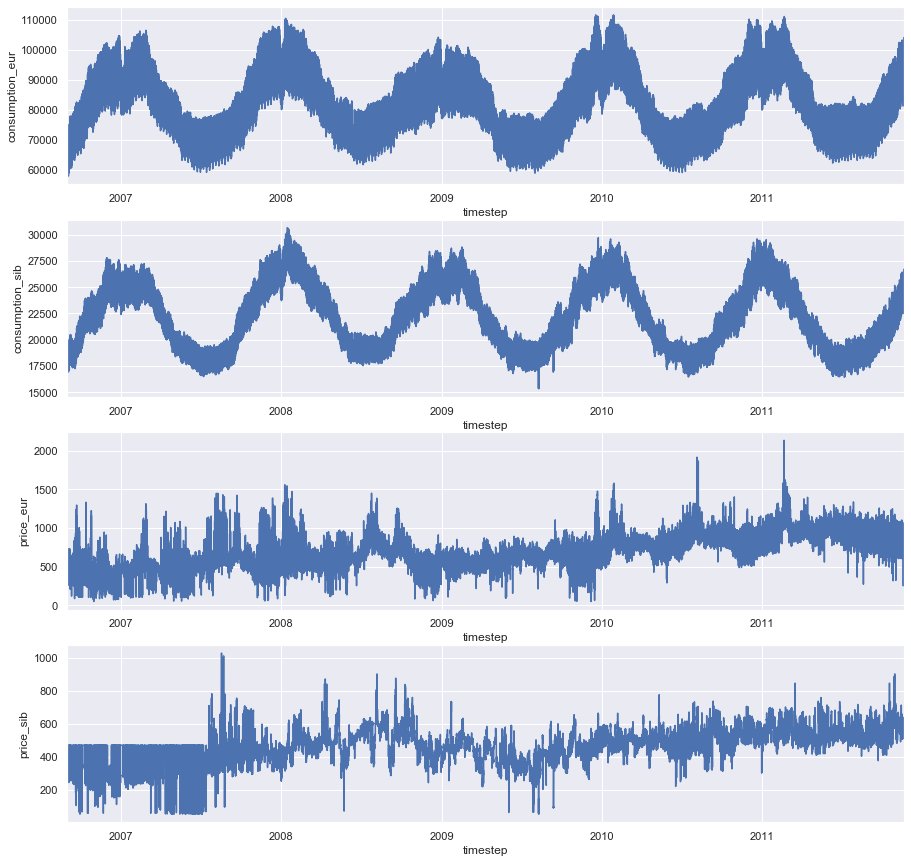

In [15]:
plt.figure(figsize = (15,15))

ax1 = plt.subplot(4, 1, 1)
dayahead_price['consumption_eur'].plot()
ax1.set_ylabel("consumption_eur")

ax2 = plt.subplot(4, 1, 2)
dayahead_price['consumption_sib'].plot()
ax2.set_ylabel("consumption_sib")

ax3 = plt.subplot(4, 1, 3)
dayahead_price['price_eur'].plot()
ax3.set_ylabel("price_eur")

ax4 = plt.subplot(4, 1, 4)
dayahead_price['price_sib'].plot()
ax4.set_ylabel("price_sib")

In [16]:
UES_dayahead_price.head()

UES_Northwest  UES_Siberia  UES_Middle_Volga  UES_Urals  \
timestep                                                                       
2017-01-01 00:00:00         964.67      1006.27           1032.80     953.23   
2017-01-01 01:00:00         984.79      1003.79           1033.34     946.79   
2017-01-01 02:00:00         962.54      1005.09           1029.51     944.35   
2017-01-01 03:00:00         888.44      1002.38            976.34     906.15   
2017-01-01 04:00:00         847.10      1002.58            945.28     894.08   

                     UES_Center  UES_South  
timestep                                    
2017-01-01 00:00:00     1050.17    1706.30  
2017-01-01 01:00:00     1051.15    1592.17  
2017-01-01 02:00:00     1039.84    1561.85  
2017-01-01 03:00:00      977.04    1534.37  
2017-01-01 04:00:00      938.27    1517.58

In [26]:
"""UES_dayahead_price["datetime"] = pd.to_datetime(UES_dayahead_price["timestep"])
UES_dayahead_price.drop("timestep", axis = 1, inplace = True)
UES_dayahead_price.set_index(["datetime"], drop = True, inplace = True)
UES_dayahead_price.head()"""

'UES_dayahead_price["datetime"] = pd.to_datetime(UES_dayahead_price["timestep"])\nUES_dayahead_price.drop("timestep", axis = 1, inplace = True)\nUES_dayahead_price.set_index(["datetime"], drop = True, inplace = True)\nUES_dayahead_price.head()'

Text(0, 0.5, 'UES_South')

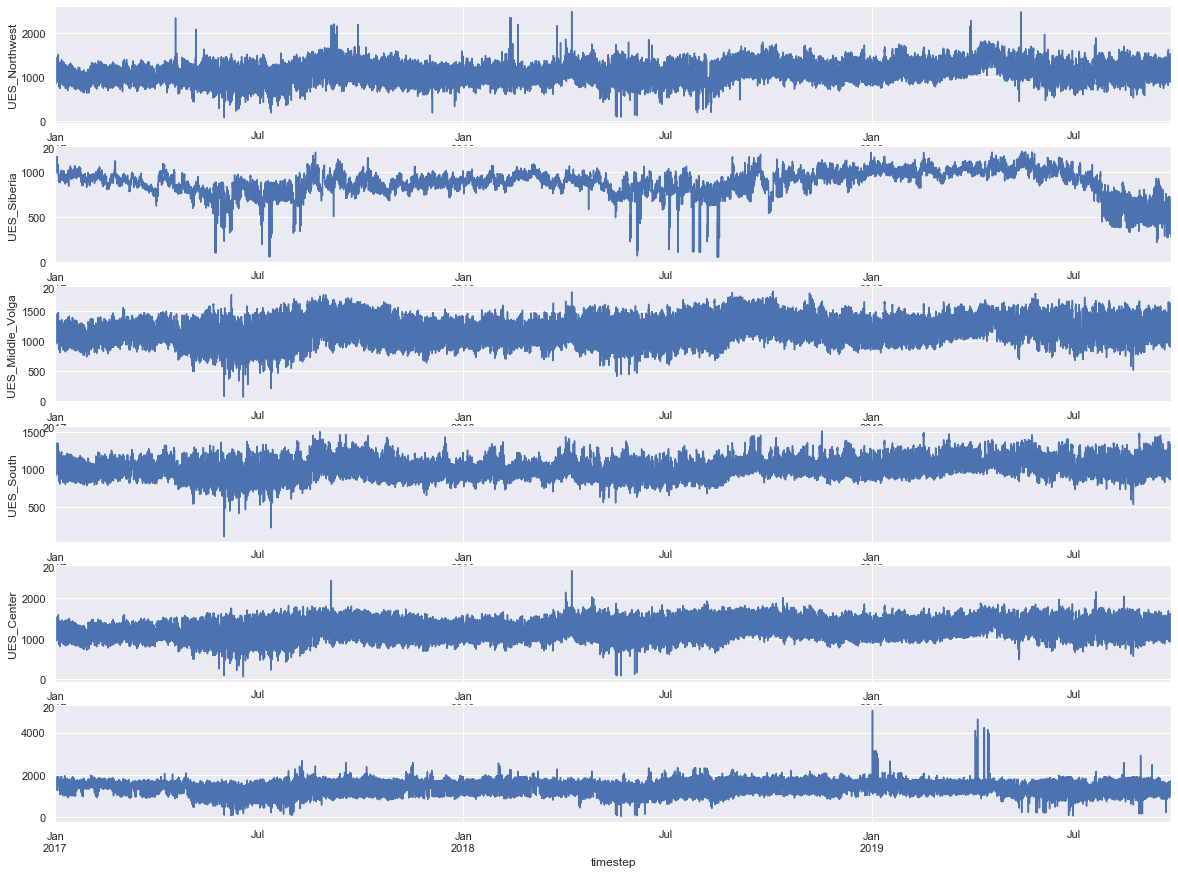

In [17]:
#time series plot
plt.figure(figsize = (20,15))

ax1 = plt.subplot(6, 1, 1)
UES_dayahead_price['UES_Northwest'].plot()
ax1.set_ylabel("UES_Northwest")

ax2 = plt.subplot(6, 1, 2)
UES_dayahead_price['UES_Siberia'].plot()
ax2.set_ylabel("UES_Siberia")

ax3 = plt.subplot(6, 1, 3)
UES_dayahead_price['UES_Middle_Volga'].plot()
ax3.set_ylabel("UES_Middle_Volga")

ax4 = plt.subplot(6, 1, 4)
UES_dayahead_price['UES_Urals'].plot()
ax4.set_ylabel("UES_Urals")

ax5 = plt.subplot(6, 1, 5)
UES_dayahead_price['UES_Center'].plot()
ax5.set_ylabel("UES_Center")

ax6 = plt.subplot(6, 1, 6)
UES_dayahead_price['UES_South'].plot()
ax4.set_ylabel("UES_South")

In [18]:
intraday_price = UES_intraday_price
intraday_price.head()

UES_Northwest  UES_Siberia  UES_Center
timestep                                                   
2017-01-01 00:00:00          767.0        918.0       982.0
2017-01-01 01:00:00          675.0        889.0       848.0
2017-01-01 02:00:00          717.0        933.0       920.0
2017-01-01 03:00:00          683.0        947.0       885.0
2017-01-01 04:00:00          633.0        934.0       829.0

In [29]:
"""intraday_price["datetime"] = pd.to_datetime(intraday_price["timestep"])
intraday_price.drop("timestep", axis = 1, inplace = True)
intraday_price.set_index(["datetime"], drop = True, inplace = True)
intraday_price.head()"""

'intraday_price["datetime"] = pd.to_datetime(intraday_price["timestep"])\nintraday_price.drop("timestep", axis = 1, inplace = True)\nintraday_price.set_index(["datetime"], drop = True, inplace = True)\nintraday_price.head()'

Text(0, 0.5, 'UES_Center')

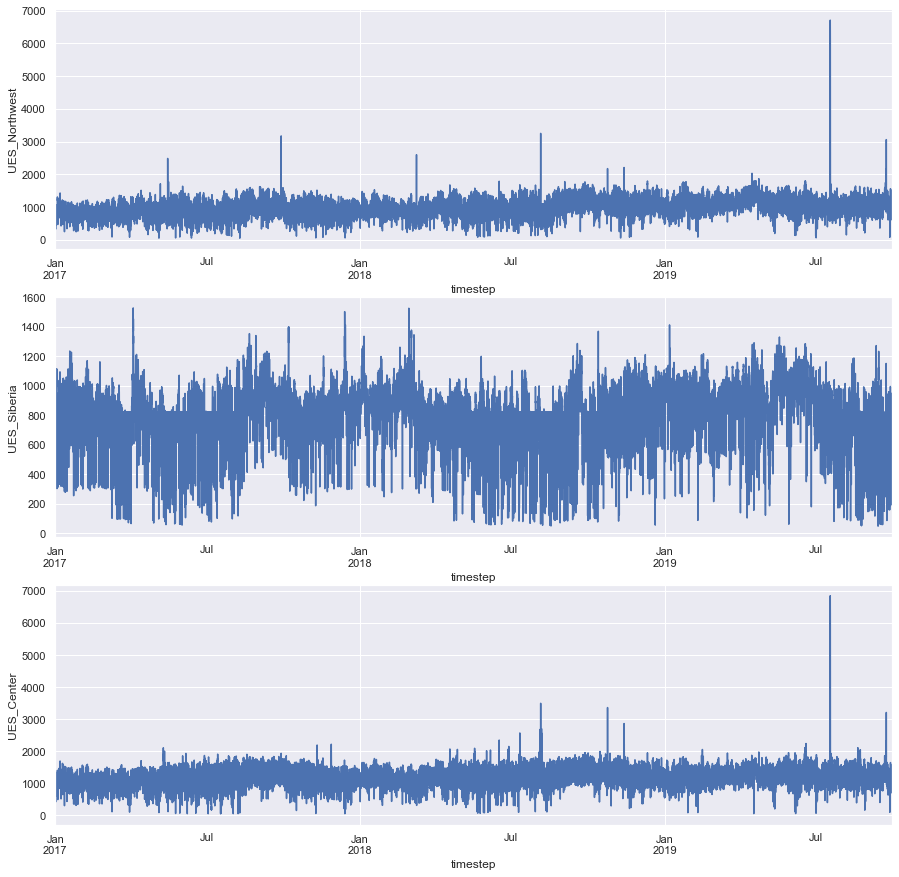

In [19]:
#time series plot
plt.figure(figsize = (15,15))

ax1 = plt.subplot(3, 1, 1)
intraday_price['UES_Northwest'].plot()
ax1.set_ylabel("UES_Northwest")

ax2 = plt.subplot(3, 1, 2)
intraday_price['UES_Siberia'].plot()
ax2.set_ylabel("UES_Siberia")

ax3 = plt.subplot(3, 1, 3)
intraday_price['UES_Center'].plot()
ax3.set_ylabel("UES_Center")


Since this is a Time series problem, we use an autoregression model.

### Check for Autocorrelation using `lag_plot()`

In [20]:
from pandas.plotting import lag_plot

In [21]:
# lets do `consumption_eur` first from the dayahead_price_volume data

# first create a dataset with the datetime and consumption_eur
consumption_eur = pd.DataFrame(dayahead_price["consumption_eur"], index = dayahead_price.index)
consumption_eur.head()



consumption_eur
timestep                            
2006-09-01 00:00:00          62341.0
2006-09-01 01:00:00          60625.0
2006-09-01 02:00:00          59685.0
2006-09-01 03:00:00          59500.0
2006-09-01 04:00:00          60617.0

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


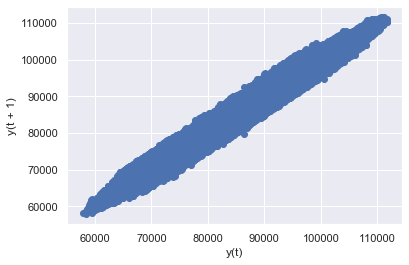

In [22]:
lag_plot(consumption_eur)
plt.show()

### Observation

A cluster of the data on the diagonal shows a high correlation in the dataset.

Let's do a Further correlation check using Pearson Correlation coeficient .corr())

In [23]:
values = pd.DataFrame(consumption_eur.values)
data = pd.concat([values.shift(1), values], axis = 1) #creates a dataset of a value -1 and value + 1
data.columns = ["t-1", "t+1"]
result = data.corr()
print(result)

          t-1       t+1
t-1  1.000000  0.983379
t+1  0.983379  1.000000


We can see a high and beautiful correlation

### Autocorrelation Plot using `autocorrelation_plot`
This plots the correlation coefficient for each lag variable. This is a good check to determine which lag variable will be a good fit for a predictive model

In [24]:
from pandas.plotting import autocorrelation_plot

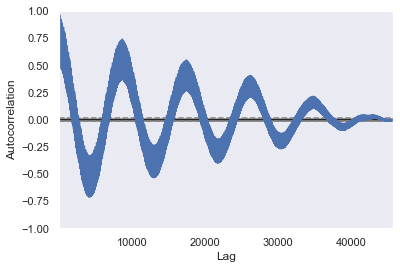

In [25]:
autocorrelation_plot(consumption_eur)
#autocorrelation_plot(, linewidth = 1)
plt.show()

Further check using the statsmodel `plot_acf`

In [26]:
from statsmodels.graphics.tsaplots import plot_acf

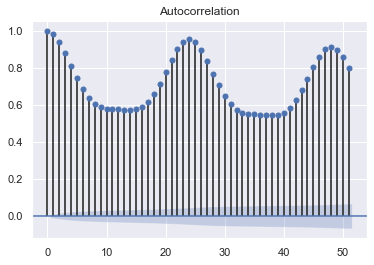

In [27]:
plot_acf(consumption_eur, lags = 51)
plt.show()

As expected, the power consumptions seem to have a nice symmetrical cyclic pattern.
The prices though seem to be quite volatile, but not unexpeted certainly.
The prices also seem to have a lot of values that are zero before the year 2010.

Since we are going to use a form of auto-regression, we are only going to use historical data of any particular attribute to make predictions for that attribute.

Let's do some autocorrelation analysis for each of the four attributes.

## THE PROPHET

In [28]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

%matplotlib inline

## Modeling with `Prophet`

In [ ]:

#conda install -c conda-forge fbprophet

In [37]:
#Functions 

#import Prophet
from prophet import Prophet
import logging

logging.getLogger().setLevel(logging.ERROR)

#Functions to automate

#resample data by week
def resample_weekly(data):
    #data.reset_index(drop = True, inplace = True)
    #data["timestep"] = pd.to_datetime(data["timestep"])
    #data.drop("timestep", axis = 1)

    #Aggregate data
    global weekly_data 
    daily_data = data.groupby("timestep").mean()
    weekly_data = daily_data.resample("W").mean()
     
    return weekly_data

# Plot the weekly data
def plot_data(data):
    for col in data.columns:
        plt.figure(figsize=(17, 8))
        plt.plot(data[col])
        plt.xlabel('timestep')
        plt.ylabel(col)
        plt.title(f"Weekly Data for {col}")
        plt.grid(False)
        plt.show()
    


#Modeling

#Create single dataset & Change columns
def single_data(data):
    global wd_cons
    global lst
    lst = []
    for col in data:
        wd_con = pd.DataFrame(data[col], index = data.index)
        wd_cons = wd_con.reset_index()
        wd_cons.columns = ["ds", "y"]
        lst.append(wd_cons)

    return lst

#split into test train data (last 30 values), Train & Predict model

def split(lst):
    global my_model
    global fut
    global split_data
    fcst_size = 30
    split_data = []
    for dt in lst:
        data = dt.copy() 
        splited = data[: - fcst_size]
        split_data.append(splited)
        
    return split_data

def train_predict(split_data):
    global model_lst
    global forcast_lst
    global fcst_size
    fcst_size = 30
    forcast_lst = []
    model_lst = []
    for tr in split_data:
        my_model = Prophet().fit(tr)
        model_lst.append(my_model)
        fut = my_model.make_future_dataframe(periods = fcst_size, freq = "W")
        forcast = my_model.predict(fut)
        forcast_lst.append(forcast)
        
    return forcast_lst
    

#plot Prediction
def plot_prediction(pred_lst, weekly_data):
    for fcst, mod, col in zip(forcast_lst, model_lst, weekly_data):
        mod.plot(fcst)
        plt.title(f"Prediction plot for {col}")

#plot forcast components
def plot_pred_comp(pred_lst, weekly_data):
    for fcst, mod, col in zip(forcast_lst, model_lst, weekly_data):
        mod.plot_components(pd.DataFrame(fcst))
        plt.title(f"Prediction Components plot for {col}")

#evaluate Model
def evaluate(historical, predicted):
        eval_data = predicted.set_index("ds")[["yhat", "yhat_lower", "yhat_upper"]].join(historical.set_index("ds"))
        return eval_data 
    
    
#eval_data = evaluate(wd_cons, prediction)
#eval_data.head()

def pred_errors(df, prediction_size):
    #df = df.copy()
    
    df['e'] = df['y'] - df['yhat']
    df['p'] = 100 * df['e'] / df['y']
    
    predicted_part = df[- fcst_size:]
    
    error_mean = lambda error_name: np.mean(np.abs(predicted_part[error_name]))
    
    return {'MAPE': error_mean('p'), 'MAE': error_mean('e')}

#for err_name, err_value in pred_errors(eval_data, pred_size).items():
   # print(err_name, err_value)


"""# Plot forecast with upper and lower bounds
plt.figure(figsize=(17, 8))
plt.plot(eval_data['yhat'], label = "prediction")
plt.plot(eval_data['yhat_lower'], label = "pred_lower")
plt.plot(eval_data['yhat_upper'], label = "pred_high")
plt.plot(eval_data['y'], label = "Actual Value")
plt.xlabel('Timestep')
plt.ylabel(wd_con.columns.values)
plt.title(f"prediction for {wd_con.columns.values}")
plt.grid(False)
plt.legend()
plt.show()"""

'# Plot forecast with upper and lower bounds\nplt.figure(figsize=(17, 8))\nplt.plot(eval_data[\'yhat\'], label = "prediction")\nplt.plot(eval_data[\'yhat_lower\'], label = "pred_lower")\nplt.plot(eval_data[\'yhat_upper\'], label = "pred_high")\nplt.plot(eval_data[\'y\'], label = "Actual Value")\nplt.xlabel(\'Timestep\')\nplt.ylabel(wd_con.columns.values)\nplt.title(f"prediction for {wd_con.columns.values}")\nplt.grid(False)\nplt.legend()\nplt.show()'

### Prediction for `UES_intraday_price`

In [31]:
UES_intraday_price.head()

UES_Northwest  UES_Siberia  UES_Center
0          767.0        918.0       982.0
1          675.0        889.0       848.0
2          717.0        933.0       920.0
3          683.0        947.0       885.0
4          633.0        934.0       829.0

In [38]:
intraday_price = UES_intraday_price.copy()

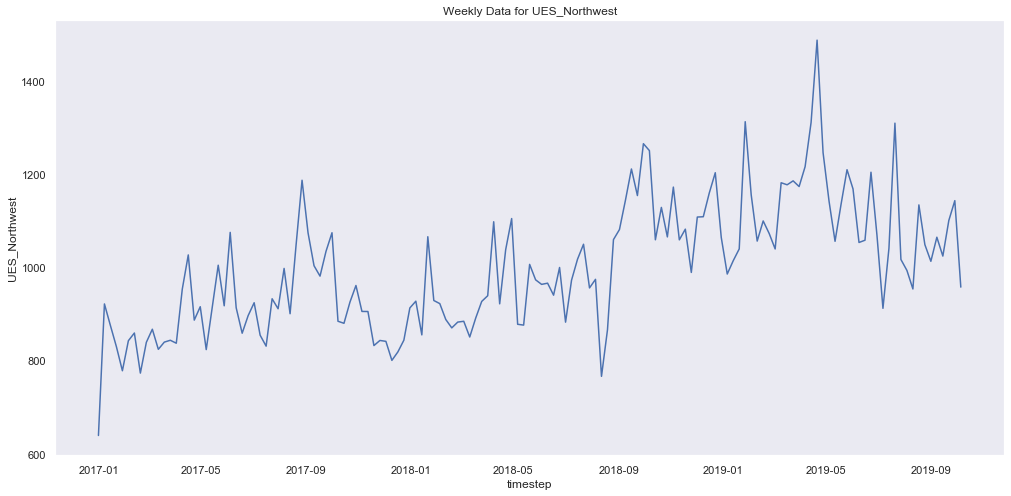

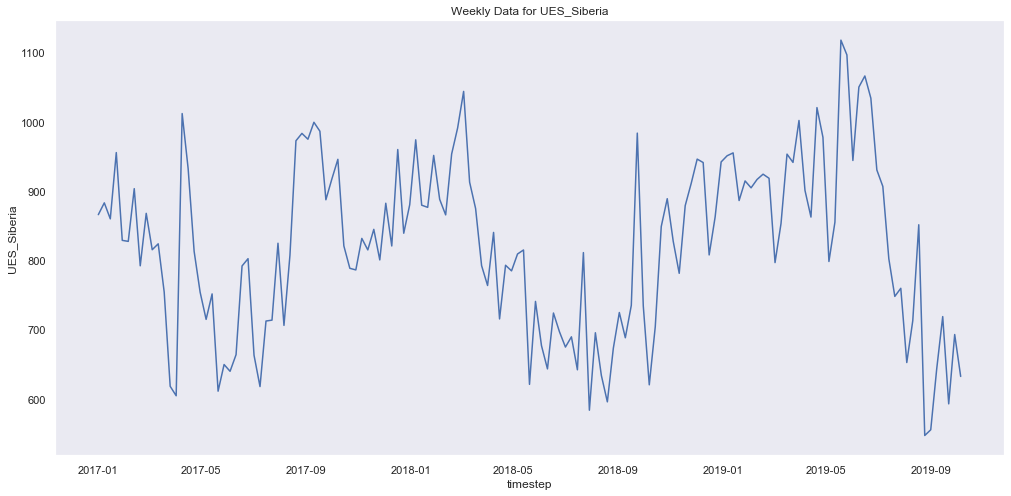

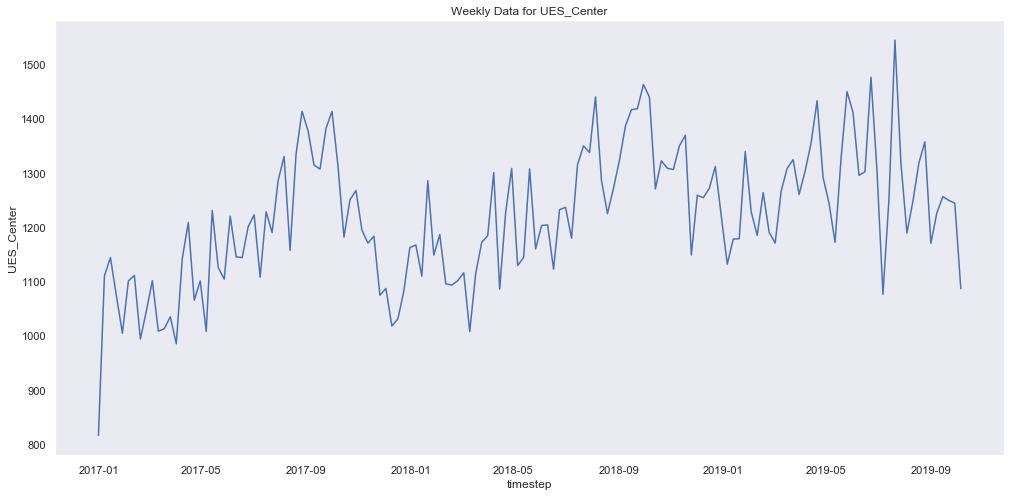

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


{'MAPE': 16.450110092088035, 'MAE': 173.81267300236968}
{'MAPE': 23.636225232388668, 'MAE': 201.79048758980903}
{'MAPE': 10.97324290340557, 'MAE': 136.77438106773533}


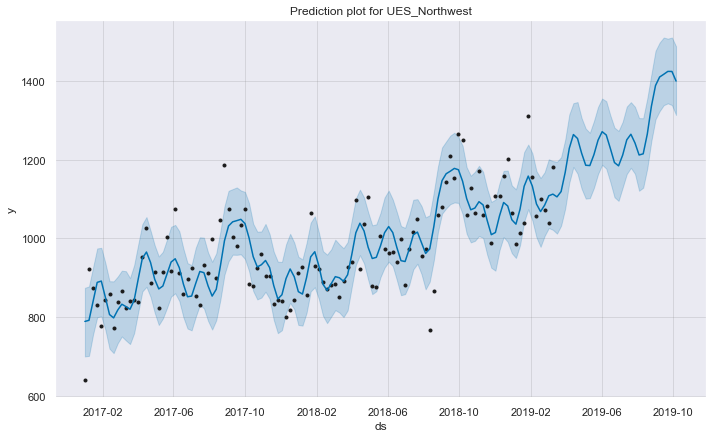

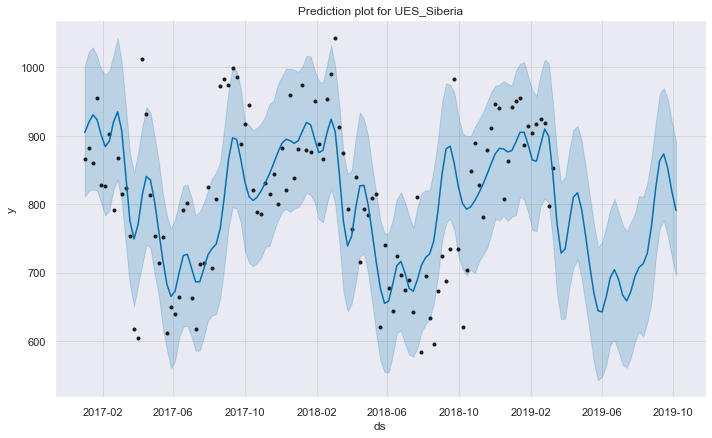

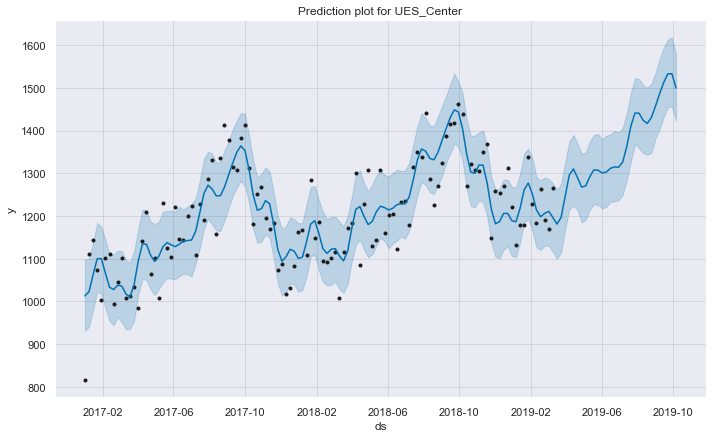

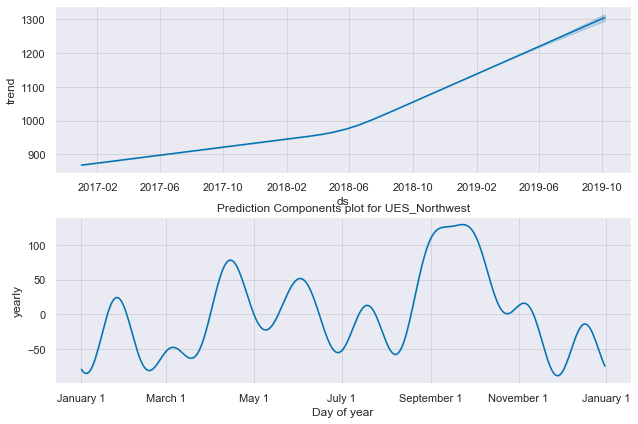

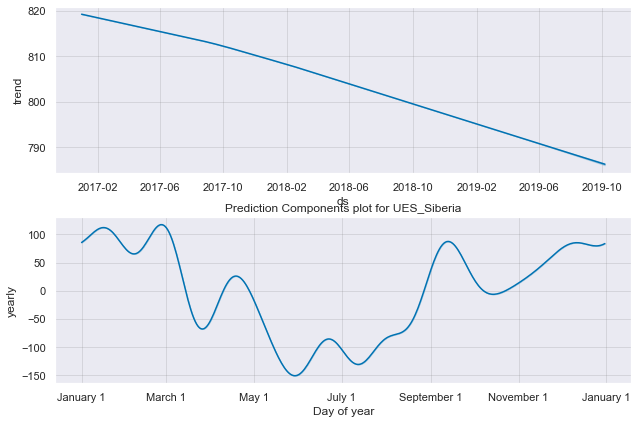

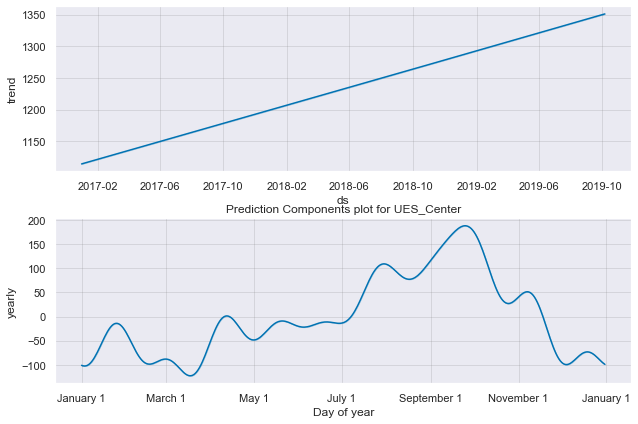

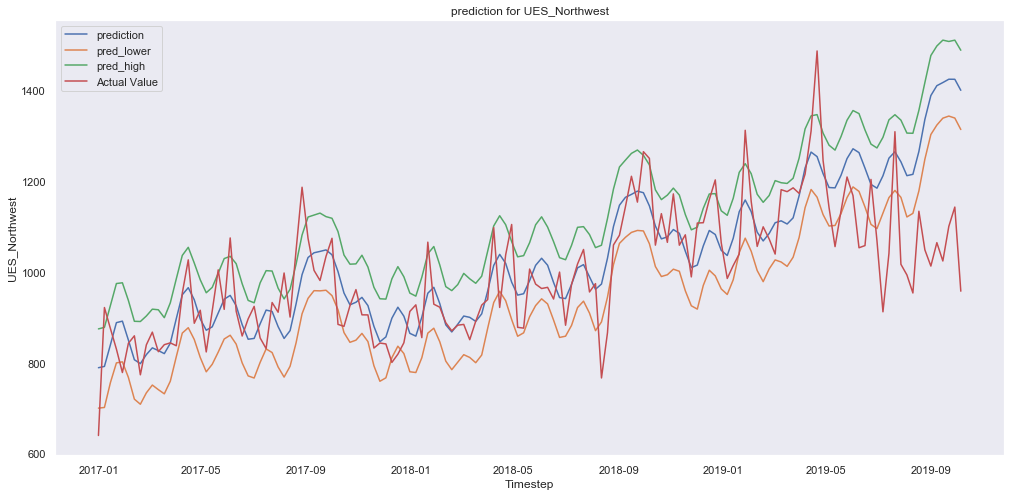

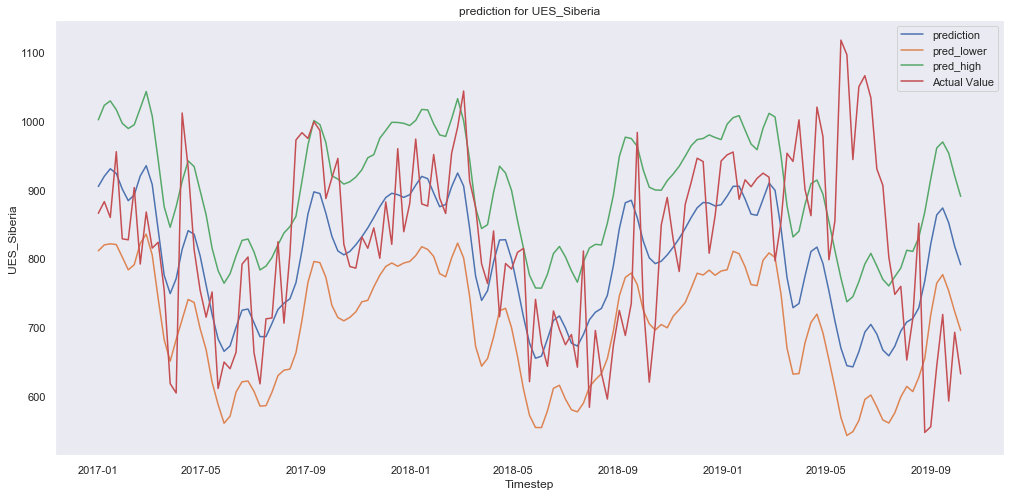

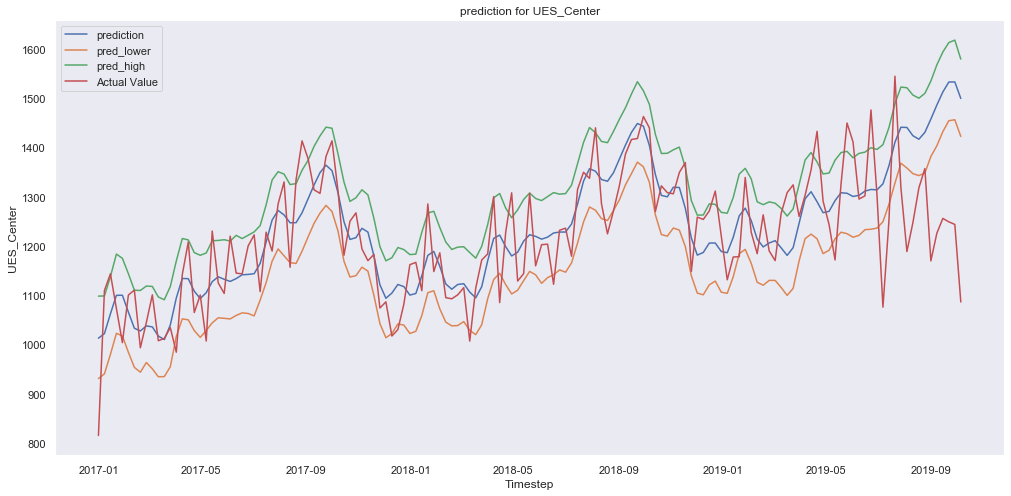

In [39]:
# Merge all code in a single run

#resample to weekly data
resample_weekly(intraday_price)

#plot weekly_data
plot_data(weekly_data)

#split dataset into single data in a list
single_data(weekly_data) 

#split each dataset into individual datasets 
split(lst)

#train and predicts each dataset
train_predict(split_data)

#plot Prediction
plot_prediction(forcast_lst, weekly_data) 

#plot forcast components
plot_pred_comp(forcast_lst, weekly_data)    
    
#evaluate data
eval_data = list(map(lambda X: evaluate(X[0],X[1]), list(zip(lst, forcast_lst))))
eval_data
    
#calc prediction error
for it in eval_data:
    pred_error = pred_errors(it, fcst_size)
    print (pred_error)

# Plot forecast with upper and lower bounds
for data, col in zip(eval_data, weekly_data):      
    plt.figure(figsize=(17, 8))
    plt.plot(data['yhat'], label = "prediction")
    plt.plot(data['yhat_lower'], label = "pred_lower")
    plt.plot(data['yhat_upper'], label = "pred_high")
    plt.plot(data['y'], label = "Actual Value")
    plt.xlabel('Timestep')
    plt.ylabel(col)
    plt.title(f"prediction for {col}")
    plt.grid(False)
    plt.legend()
    plt.show()

### Prediction for `UES_dayahead_price`

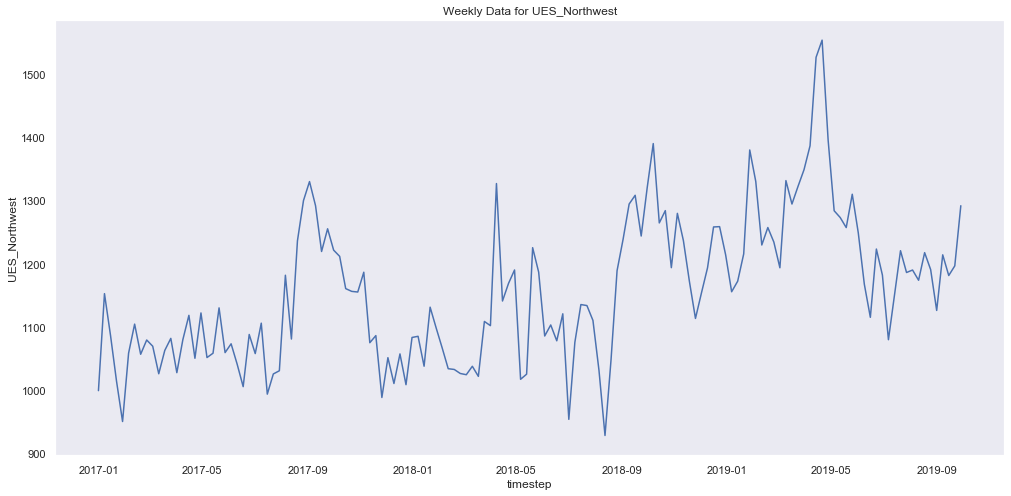

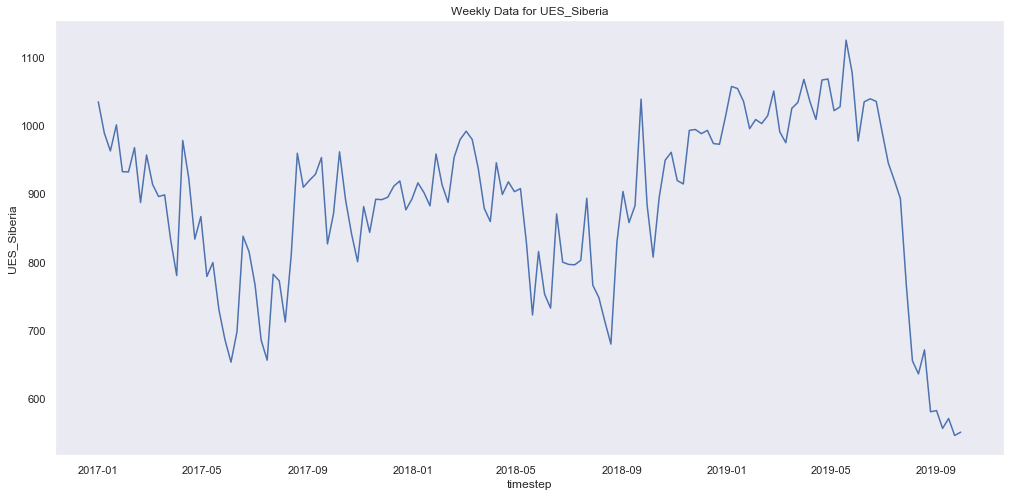

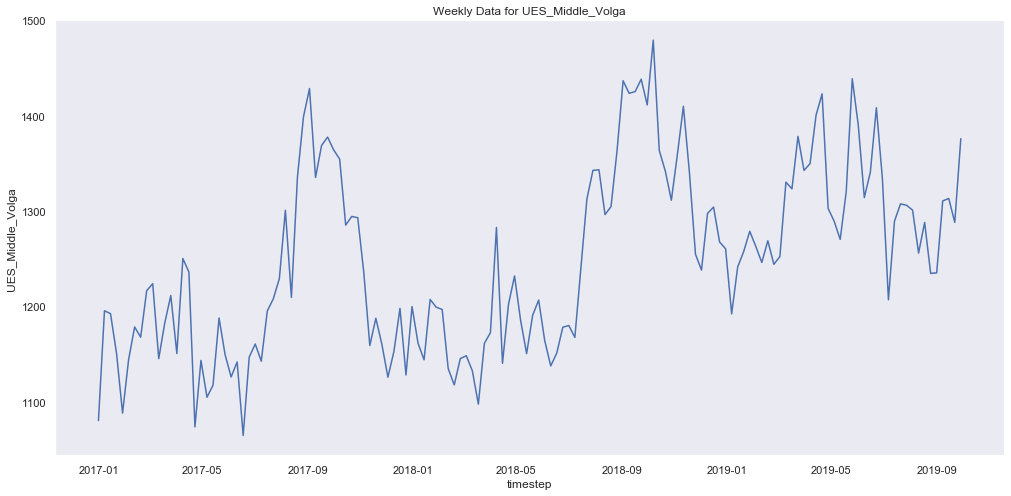

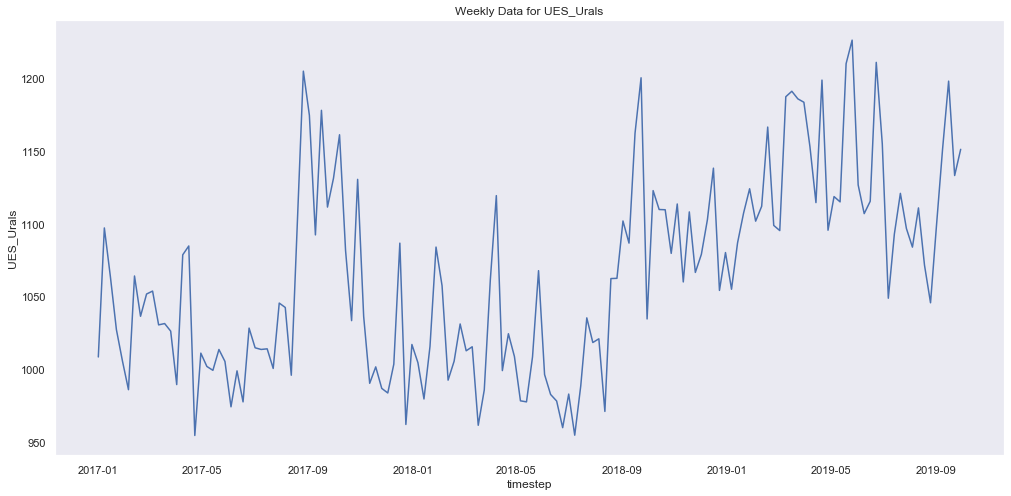

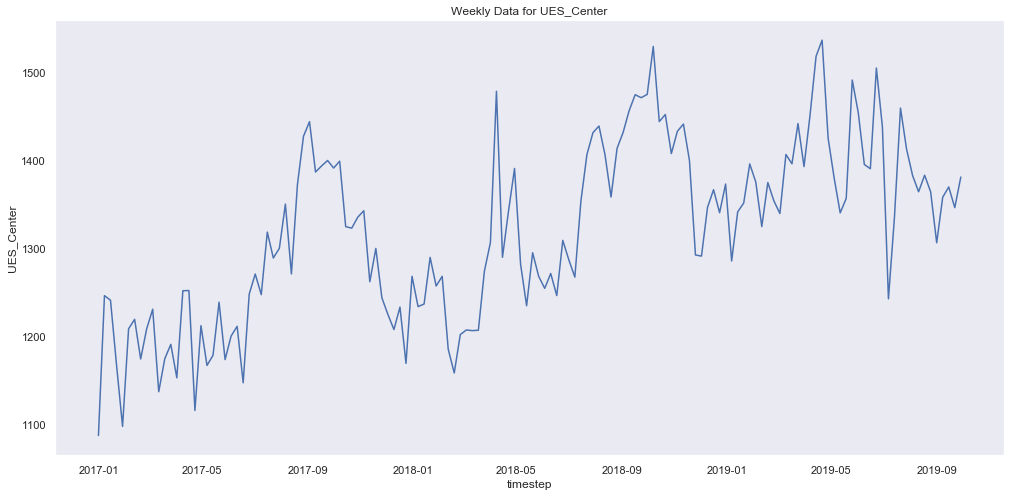

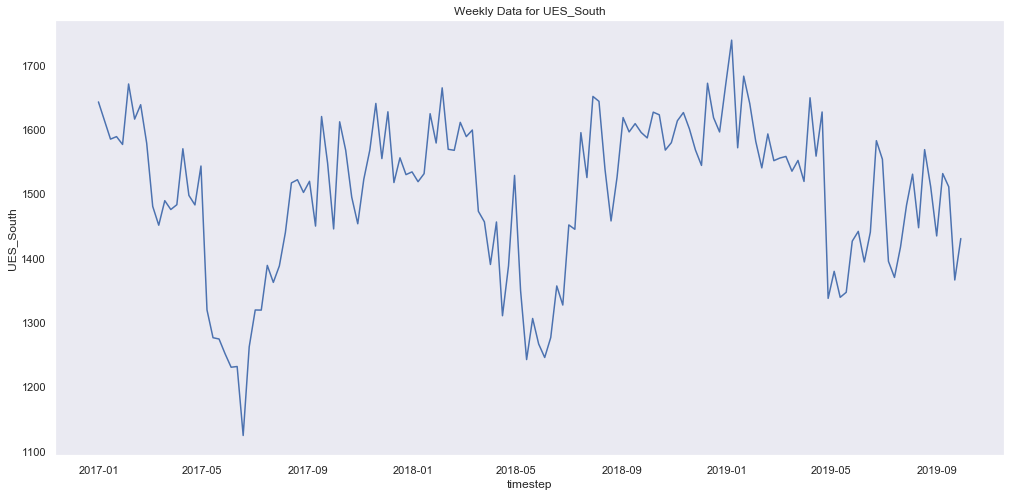

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to overr

{'MAPE': 12.551974601550397, 'MAE': 153.22883141172423}
{'MAPE': 26.181781064075118, 'MAE': 189.93987277643336}
{'MAPE': 8.64752379256075, 'MAE': 113.63776746173234}
{'MAPE': 6.409783683341024, 'MAE': 72.85585450782735}
{'MAPE': 7.628635542943105, 'MAE': 105.19765564254334}
{'MAPE': 7.00905897565444, 'MAE': 102.35133572271073}


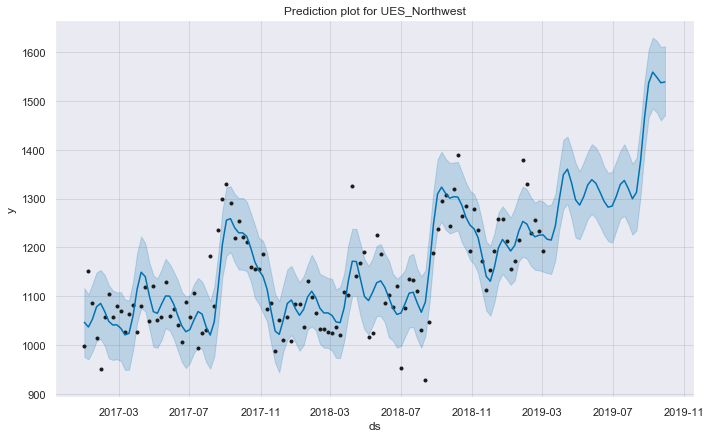

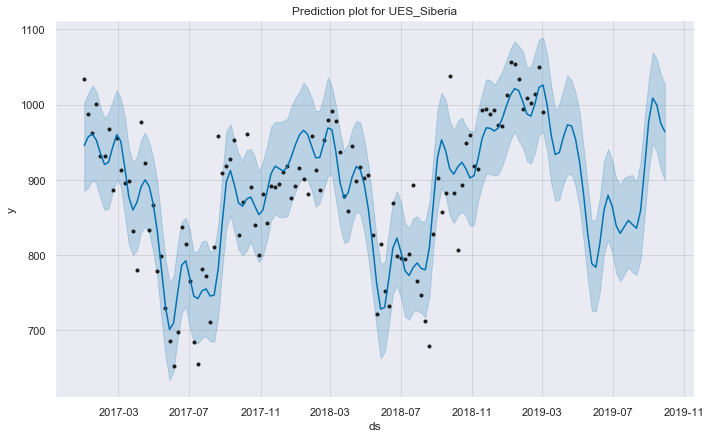

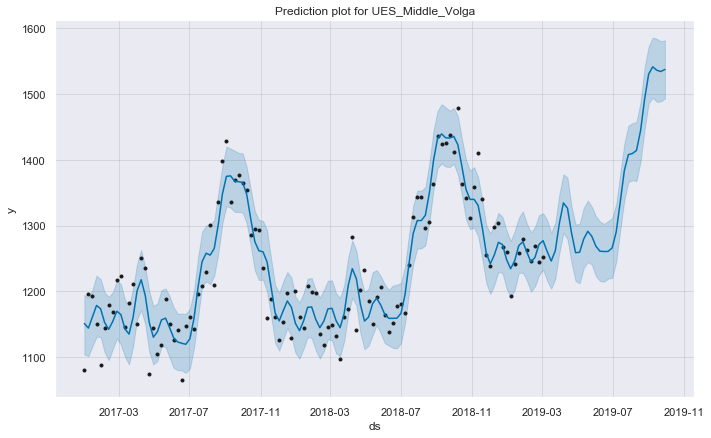

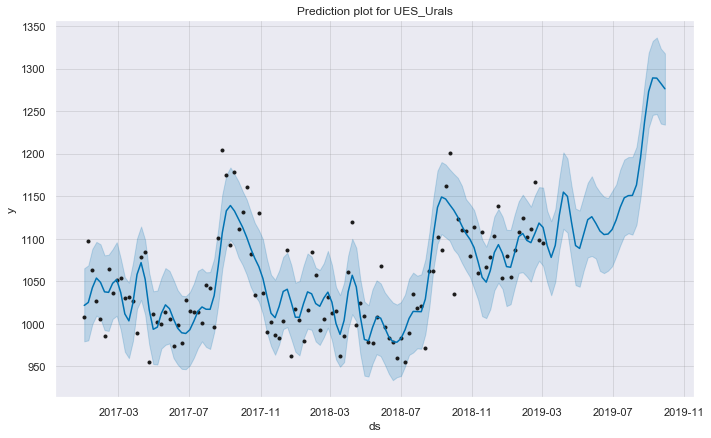

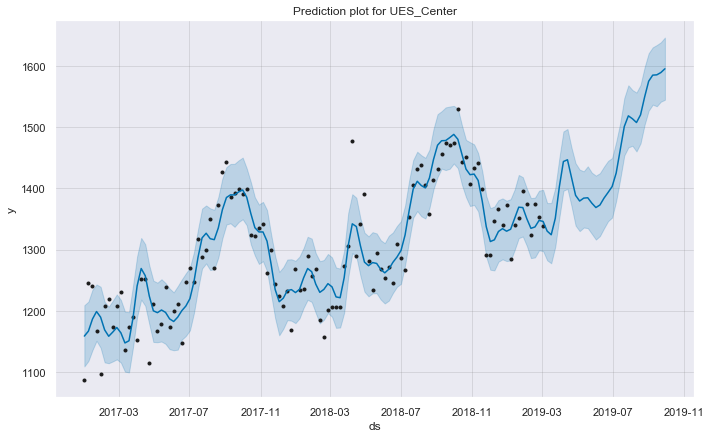

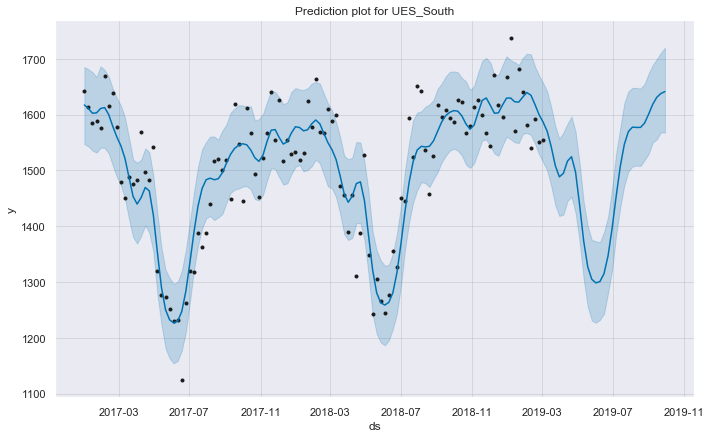

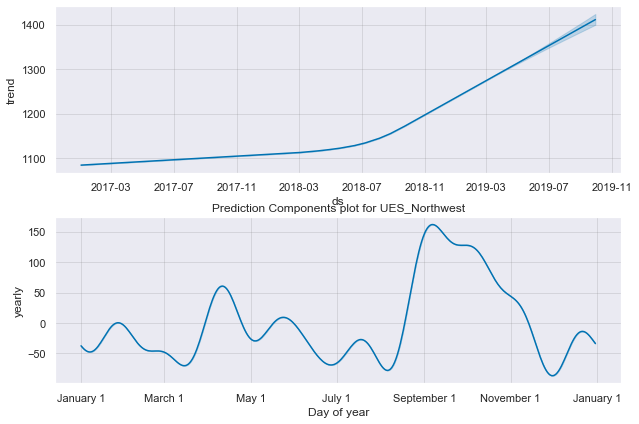

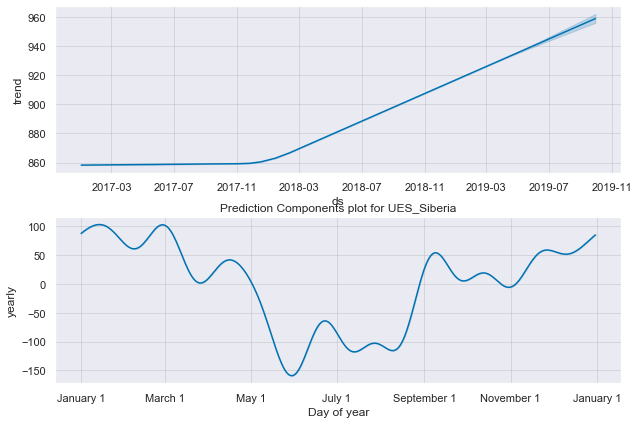

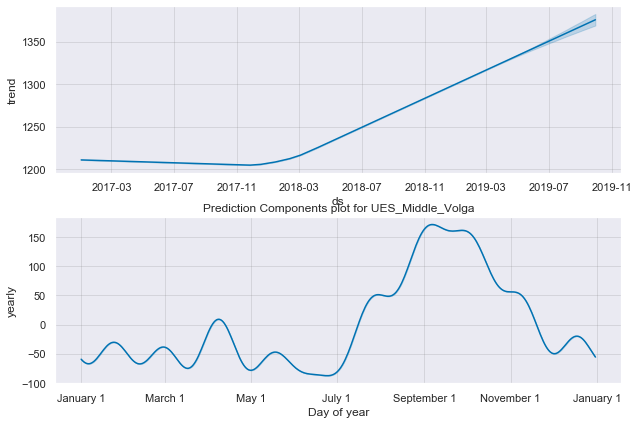

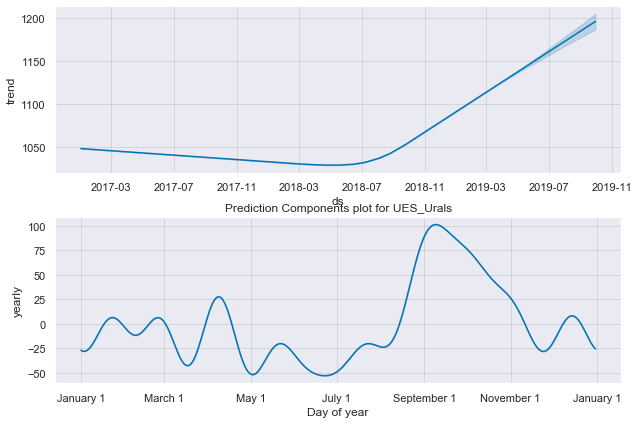

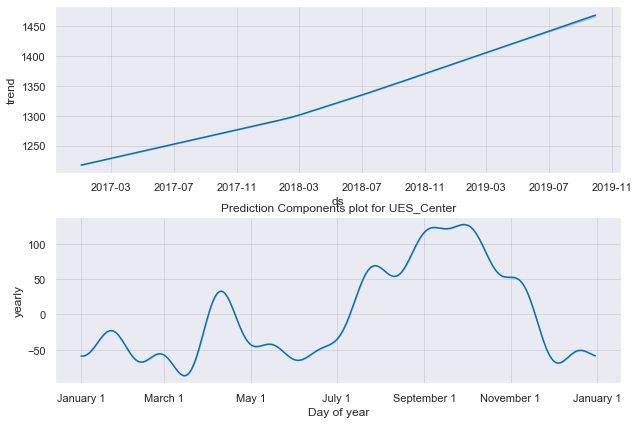

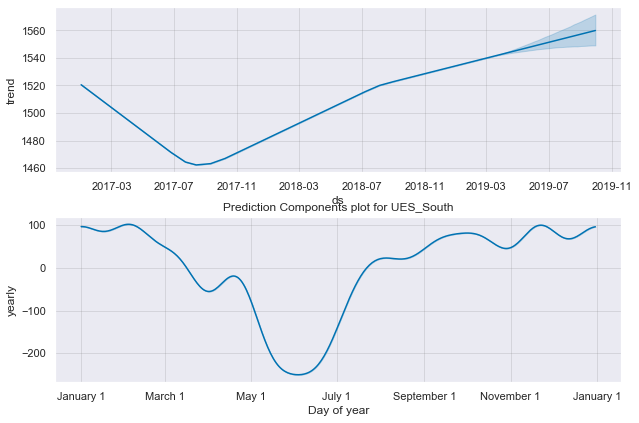

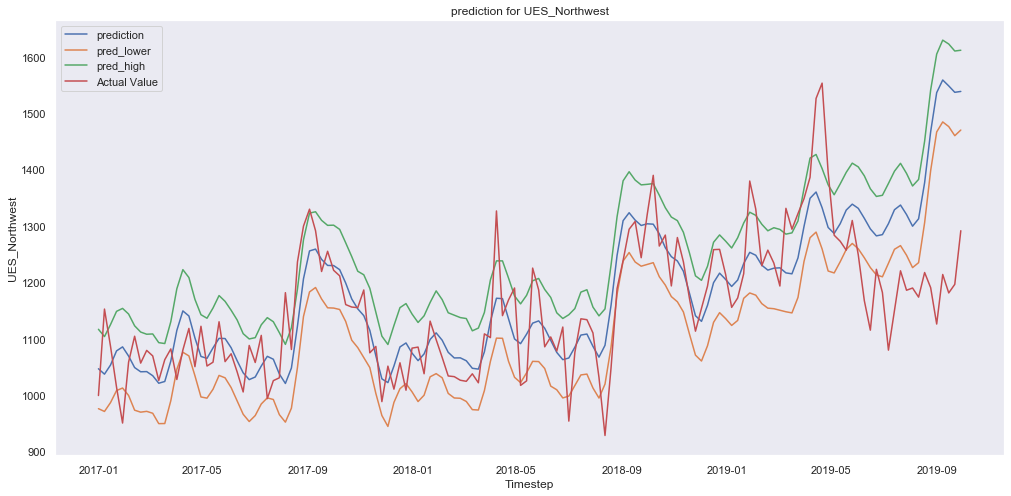

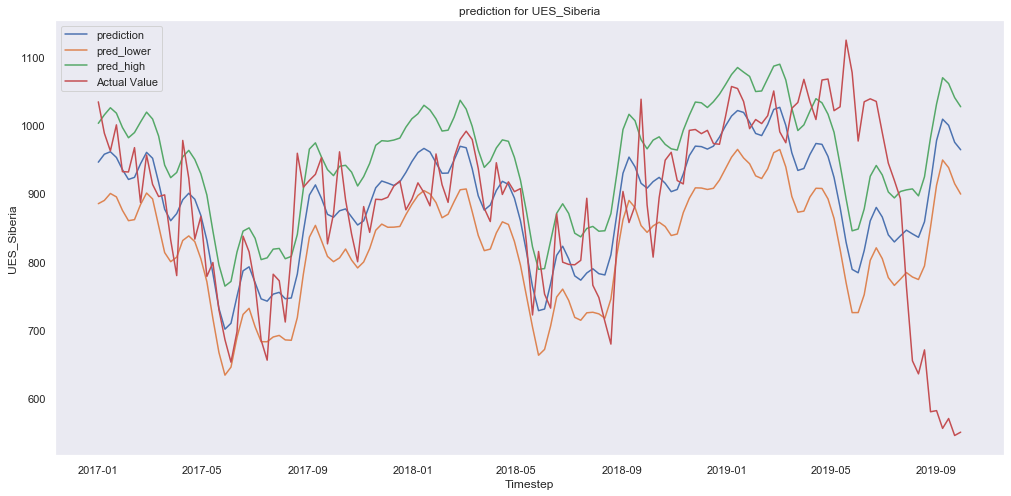

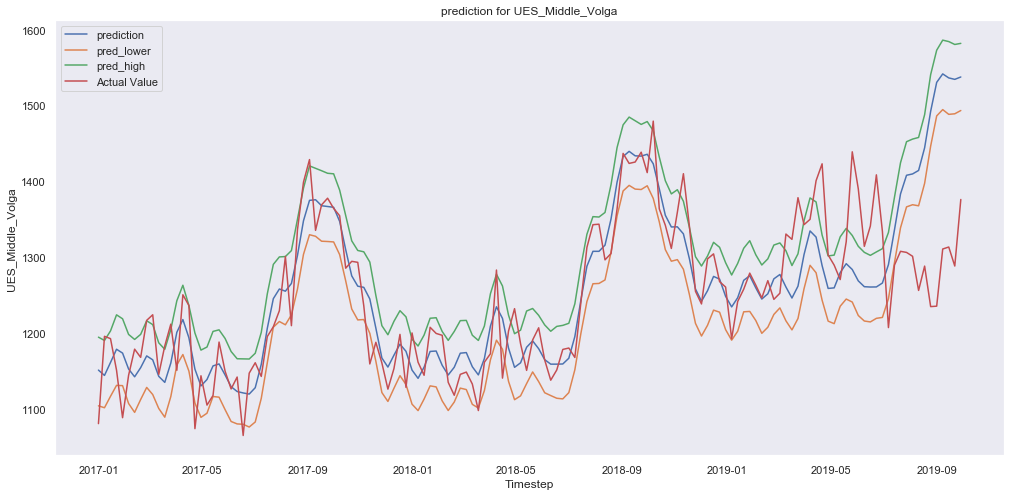

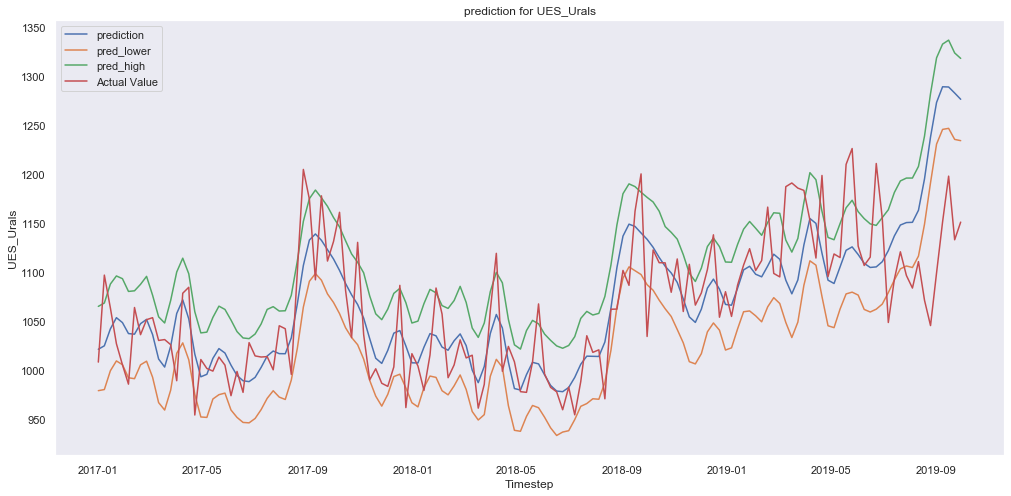

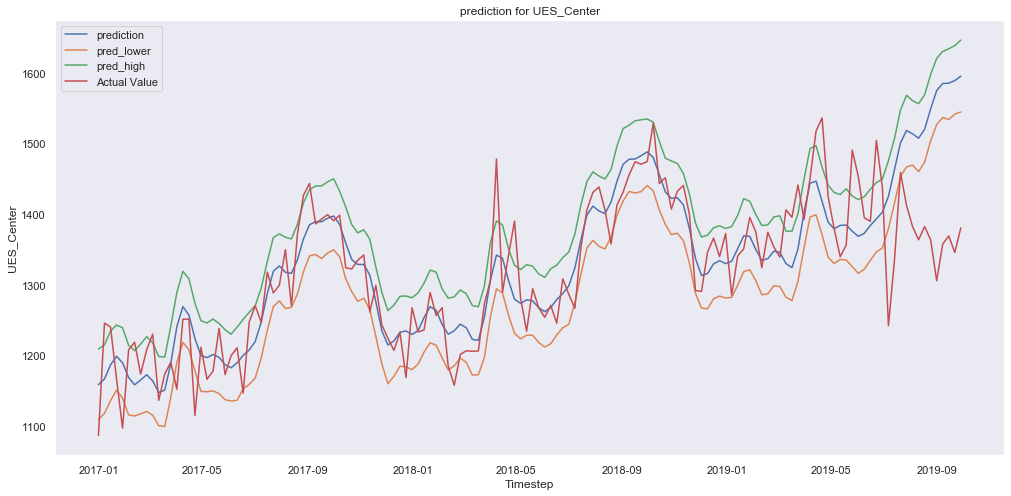

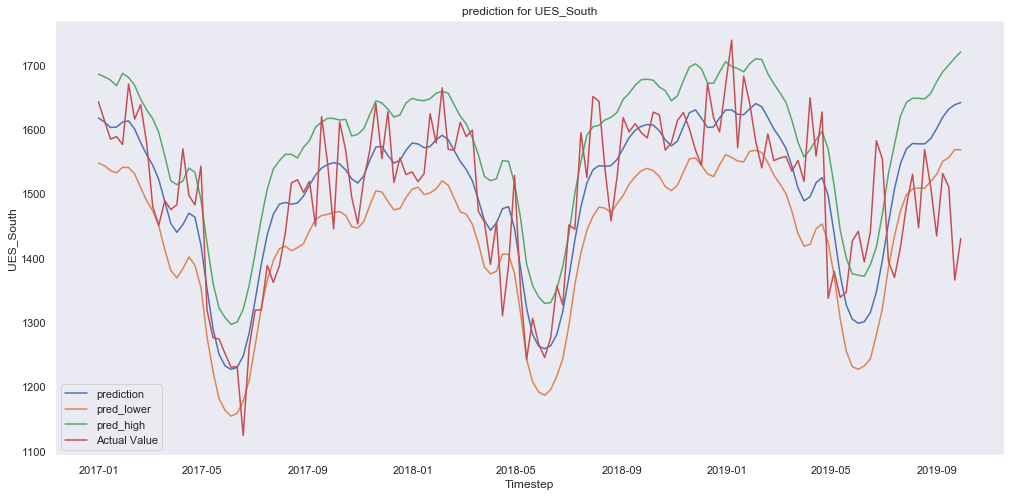

In [40]:
# Merge all code in a single run

#resample to weekly data
resample_weekly(UES_dayahead_price)

#plot weekly_data
plot_data(weekly_data)

#split dataset into single data in a list
single_data(weekly_data) 

#split each dataset into individual datasets 
split(lst)

#train and predicts each dataset
train_predict(split_data)

#plot Prediction
plot_prediction(forcast_lst, weekly_data) 

#plot forcast components
plot_pred_comp(forcast_lst, weekly_data)    
    
#evaluate data
eval_data = list(map(lambda X: evaluate(X[0],X[1]), list(zip(lst, forcast_lst))))
eval_data
    
#calc prediction error
for it in eval_data:
    pred_error = pred_errors(it, fcst_size)
    print(pred_error)

# Plot forecast with upper and lower bounds
for data, col in zip(eval_data, weekly_data):      
    plt.figure(figsize=(17, 8))
    plt.plot(data['yhat'], label = "prediction")
    plt.plot(data['yhat_lower'], label = "pred_lower")
    plt.plot(data['yhat_upper'], label = "pred_high")
    plt.plot(data['y'], label = "Actual Value")
    plt.xlabel('Timestep')
    plt.ylabel(col)
    plt.title(f"prediction for {col}")
    plt.grid(False)
    plt.legend()
    plt.show()

### Prediction for `PZ_dayahead_price_volume`

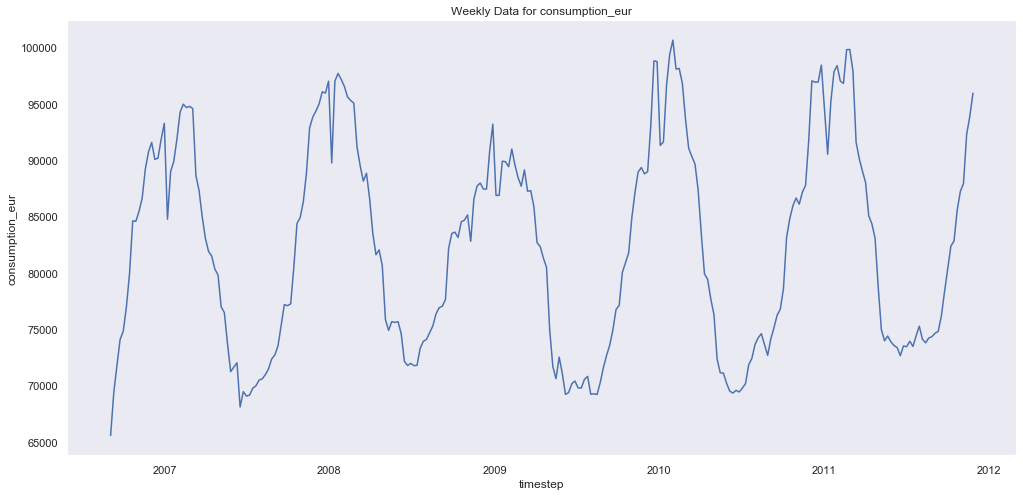

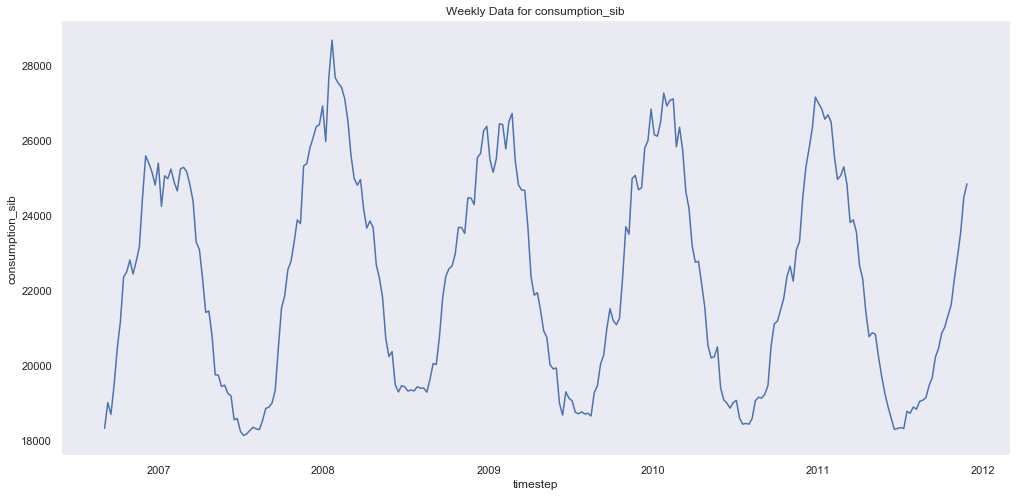

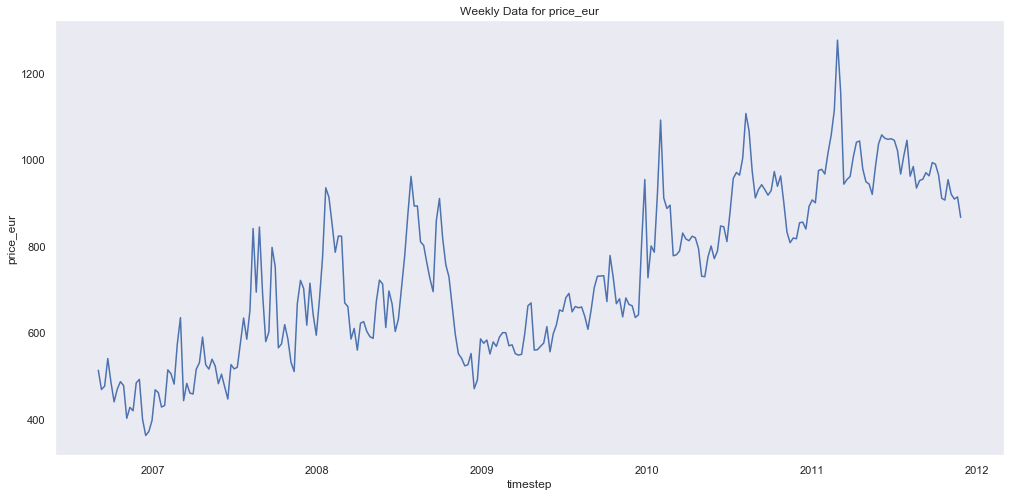

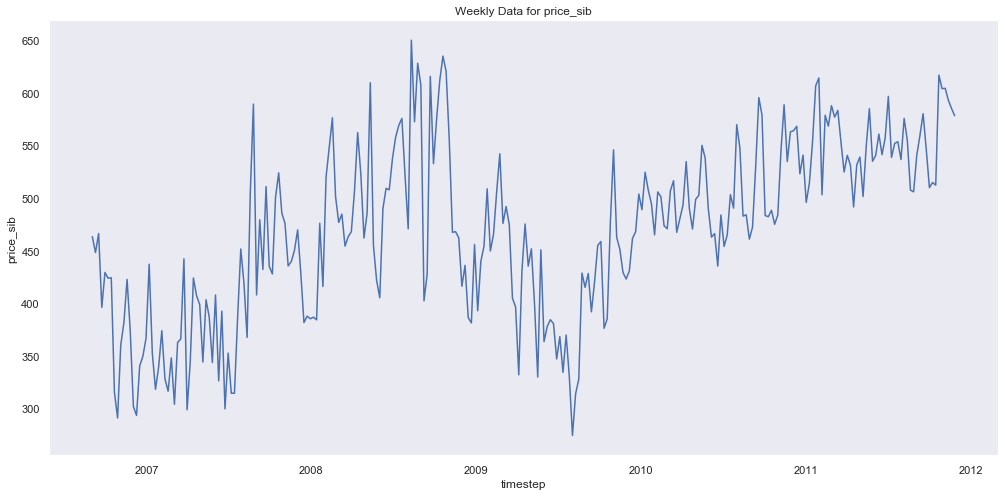

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


{'MAPE': 2.0796694564065223, 'MAE': 1629.8675894178261}
{'MAPE': 1.8690472014301582, 'MAE': 378.52111114548245}
{'MAPE': 15.649281134229, 'MAE': 149.34181879336842}
{'MAPE': 6.736959637263595, 'MAE': 36.22570504995695}


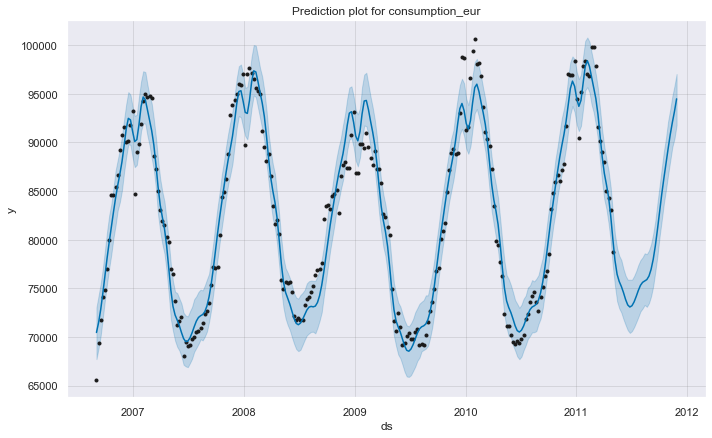

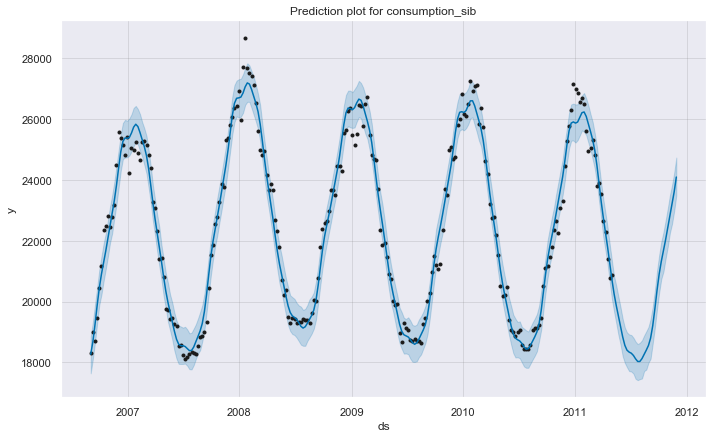

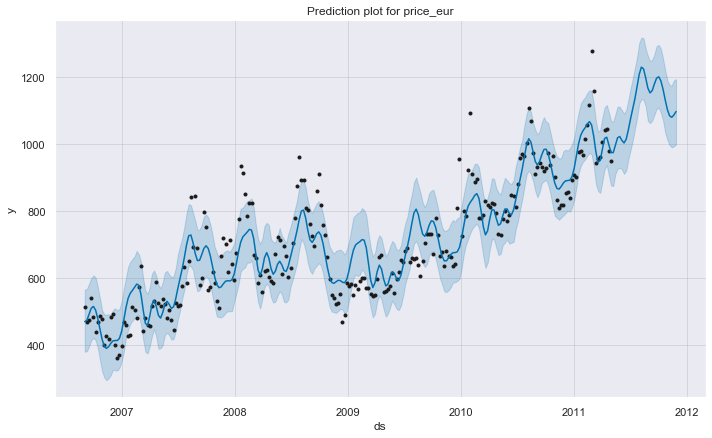

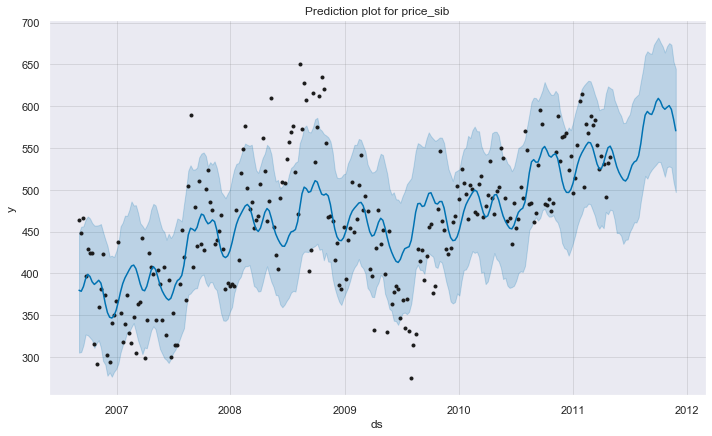

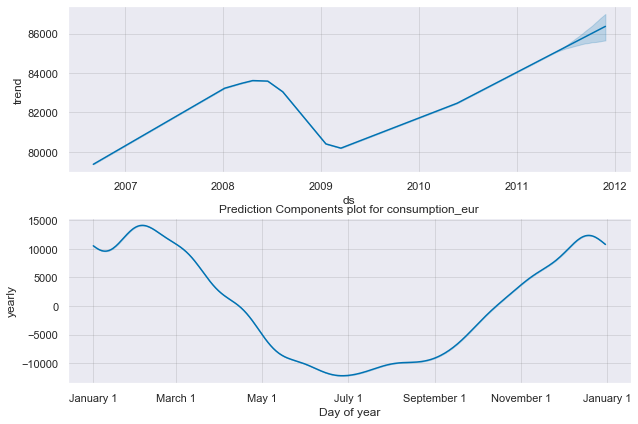

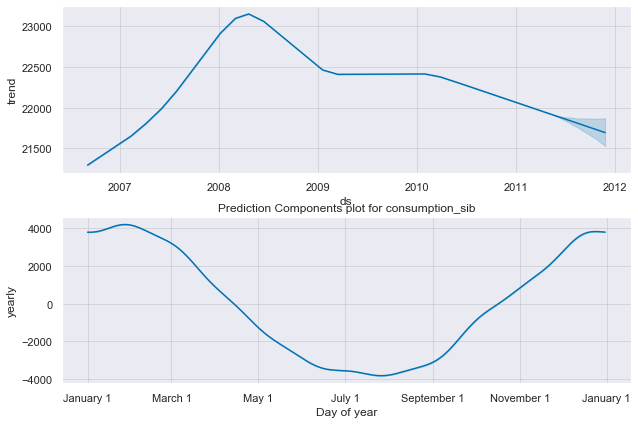

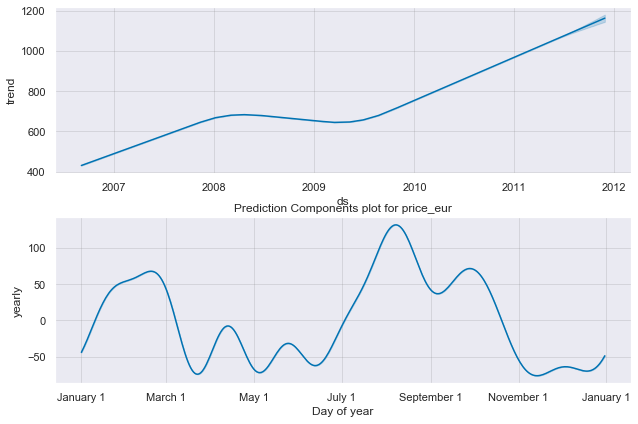

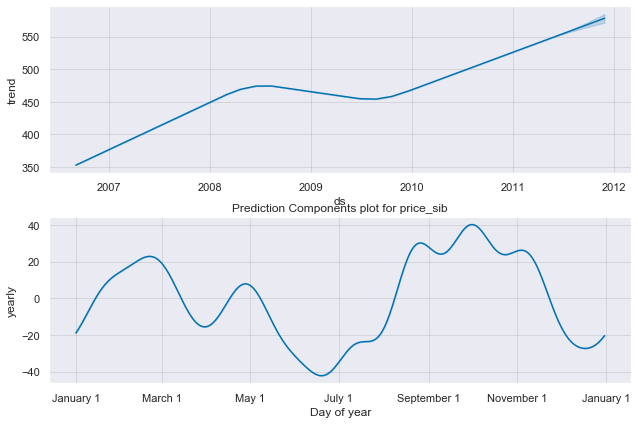

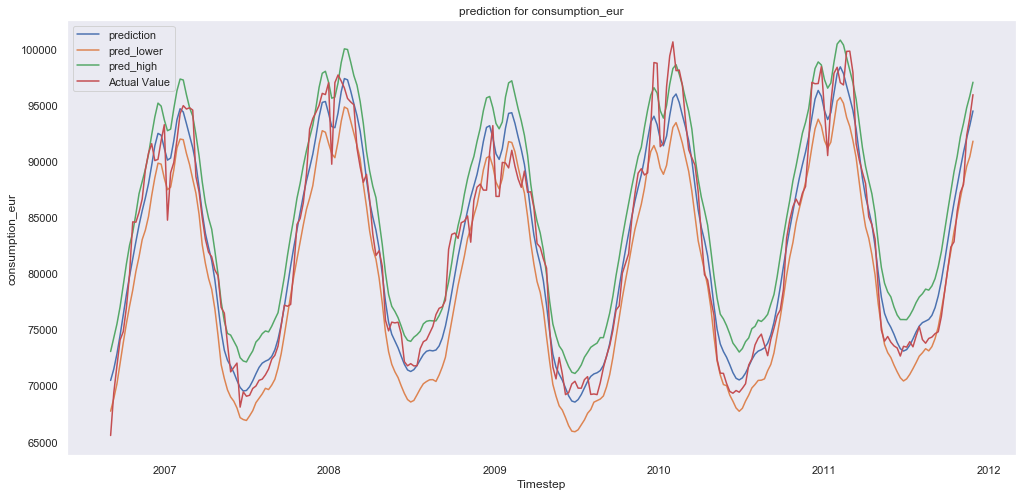

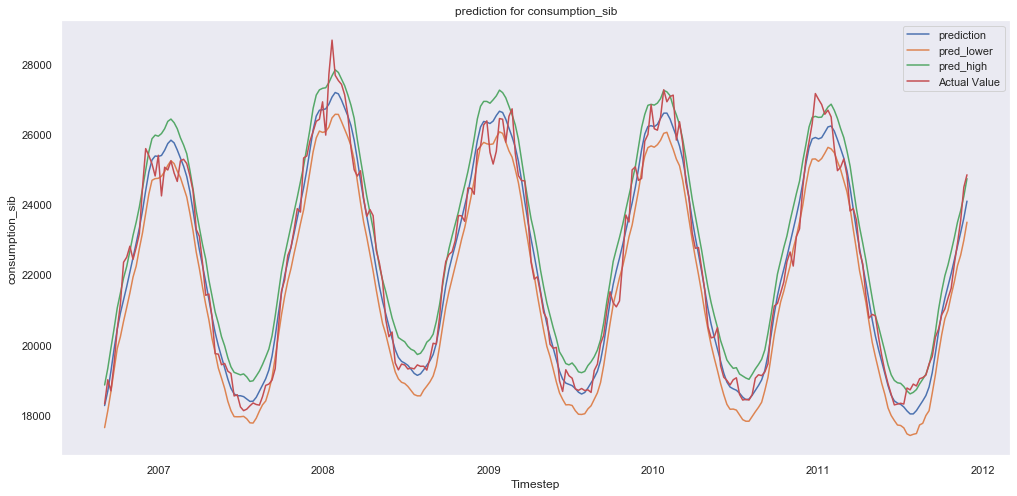

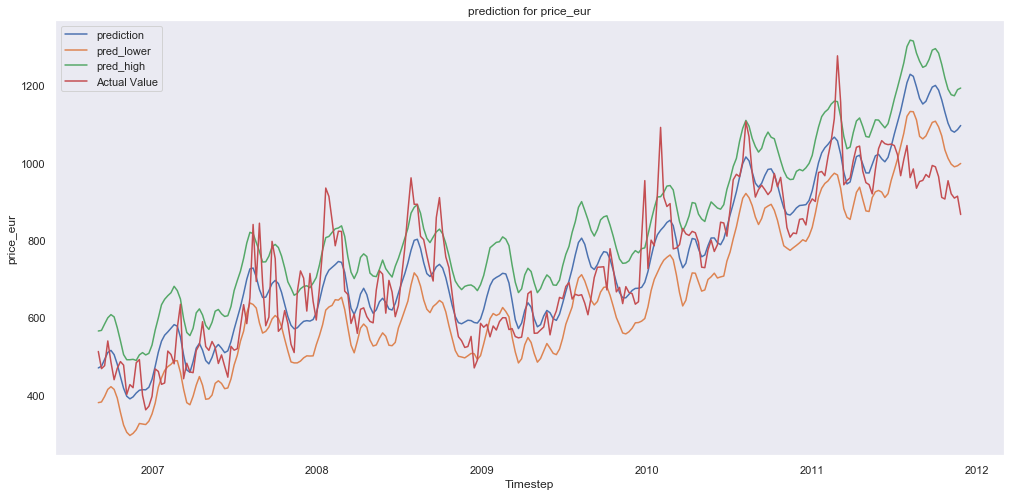

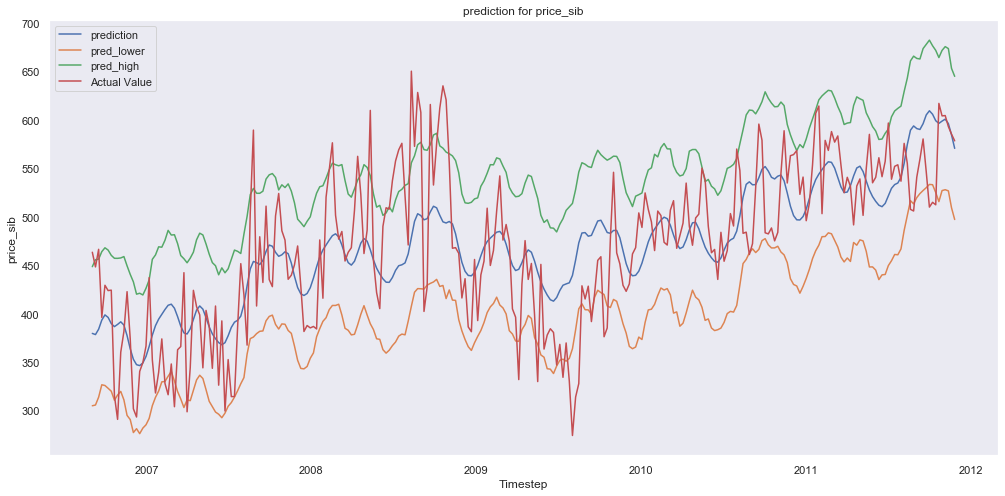

In [41]:
# Merge all code in a single run

#resample to weekly data
resample_weekly(PZ_dayahead_price_volume)

#plot weekly_data
plot_data(weekly_data)

#split dataset into single data in a list
single_data(weekly_data) 

#split each dataset into individual datasets 
split(lst)

#train and predicts each dataset
train_predict(split_data)

#plot Prediction
plot_prediction(forcast_lst, weekly_data) 

#plot forcast components
plot_pred_comp(forcast_lst, weekly_data)    
    
#evaluate data
eval_data = list(map(lambda X: evaluate(X[0],X[1]), list(zip(lst, forcast_lst))))
eval_data
    
#calc prediction error
for it in eval_data:
    pred_error = pred_errors(it, fcst_size)
    print(pred_error)

# Plot forecast with upper and lower bounds
for data, col in zip(eval_data, weekly_data):      
    plt.figure(figsize=(17, 8))
    plt.plot(data['yhat'], label = "prediction")
    plt.plot(data['yhat_lower'], label = "pred_lower")
    plt.plot(data['yhat_upper'], label = "pred_high")
    plt.plot(data['y'], label = "Actual Value")
    plt.xlabel('Timestep')
    plt.ylabel(col)
    plt.title(f"prediction for {col}")
    plt.grid(False)
    plt.legend()
    plt.show()